# Downloading data from s3

In [5]:
import pandas as pd
from tqdm import tqdm
def load_csv_from_s3(model, checkpoint, s3):
    '''Loads .csv evals from s3 to a pandas DataFrame
    
    This function assumes that evals are stored as a group of csv file parts per model
    It also assumes that the evals are stored inside 
    s-eai-neox/memorization-evals/memorization_`model`_`checkpoint`/
    folder
    
    `model`: Name of the model
    `checkpoint`: Checkpoint of that particular model
    `s3`: Boto3 s3 client instance
    '''
    bucket_prefix = f'memorization-evals/memorization_{model}_{checkpoint}/'
    parts = s3.list_objects_v2(
        Bucket= 's-eai-neox',
        Prefix = bucket_prefix,
    )
    eval_parts = [None for i in range(len(parts['Contents']))]
    if model == '160m-deduped-v0' and str(checkpoint) == '103000':
        eval_parts = [None for i in range(256)]
    if model == '2.8b-deduped-v0' and str(checkpoint) == '43000':
        eval_parts = [None for i in range(256)]
        
    for part in tqdm(parts['Contents'], desc = f'{model}-{checkpoint}'):
        part_key = part['Key']
        rank = part_key.split('/')[-1].strip('.csv')
        index = int(rank.split('-')[-1])
        if model == '160m-deduped-v0' and str(checkpoint) == '103000':
            if index >= 256:
                print(f"skipping index {index}")
                continue
        if model == '2.8b-deduped-v0' and str(checkpoint) == '43000':
            if index >= 256:
                print(f"skipping index {index}")
                continue
        
        try:
            eval_parts[index] = pd.read_csv('s3://s-eai-neox/' + part_key, names=['index', 'accuracy'])
        except IndexError as e:
            print(index)
            raise e
    return pd.concat(eval_parts)

In [6]:
import boto3
import os
s3 = boto3.client('s3')
res = s3.list_objects_v2(
    Bucket= 's-eai-neox',
    Prefix ='memorization-evals/',
    Delimiter = '/',
)
for model in res['CommonPrefixes']:
    _, model, checkpoint = model['Prefix'].split('/')[1].split('_')
    model_to_save = '-'.join(model.split("-")[:-1])
    if model.split("-")[-1] != 'v0':
        continue
    if os.path.isfile(f'/fsx/orz/memorization-evals/evals_32/memorization_{model_to_save}_{checkpoint}.hdf'):
        continue
    csv = load_csv_from_s3(model, checkpoint, s3)
    
    csv.to_hdf(f'/fsx/orz/memorization-evals/evals_32/memorization_{model_to_save}_{checkpoint}.hdf', key='memorization', index = False)

160m-deduped-v0-103000:  34%|██████████████▋                            | 175/512 [00:53<02:11,  2.56it/s]

skipping index 256
skipping index 257
skipping index 258
skipping index 259


160m-deduped-v0-103000:  35%|███████████████                            | 180/512 [00:54<00:57,  5.80it/s]

skipping index 260
skipping index 261
skipping index 262
skipping index 263
skipping index 264
skipping index 265
skipping index 266
skipping index 267
skipping index 268
skipping index 269


160m-deduped-v0-103000:  37%|████████████████                           | 191/512 [00:54<00:27, 11.63it/s]

skipping index 270
skipping index 271
skipping index 272
skipping index 273
skipping index 274
skipping index 275
skipping index 276
skipping index 277
skipping index 278
skipping index 279


160m-deduped-v0-103000:  39%|████████████████▉                          | 202/512 [00:54<00:19, 15.66it/s]

skipping index 280
skipping index 281
skipping index 282
skipping index 283
skipping index 284
skipping index 285
skipping index 286
skipping index 287
skipping index 288
skipping index 289


160m-deduped-v0-103000:  42%|█████████████████▉                         | 213/512 [00:55<00:14, 20.14it/s]

skipping index 290
skipping index 291
skipping index 292
skipping index 293
skipping index 294
skipping index 295
skipping index 296
skipping index 297
skipping index 298
skipping index 299


160m-deduped-v0-103000:  44%|███████████████████                        | 227/512 [00:56<00:17, 16.23it/s]

skipping index 300
skipping index 301
skipping index 302
skipping index 303
skipping index 304
skipping index 305
skipping index 306
skipping index 307
skipping index 308
skipping index 309


160m-deduped-v0-103000:  46%|███████████████████▊                       | 236/512 [00:56<00:14, 18.82it/s]

skipping index 310
skipping index 311
skipping index 312
skipping index 313
skipping index 314
skipping index 315
skipping index 316
skipping index 317
skipping index 318
skipping index 319


160m-deduped-v0-103000:  48%|████████████████████▋                      | 247/512 [00:57<00:13, 19.32it/s]

skipping index 320
skipping index 321
skipping index 322
skipping index 323
skipping index 324
skipping index 325
skipping index 326
skipping index 327
skipping index 328
skipping index 329


160m-deduped-v0-103000:  50%|█████████████████████▋                     | 258/512 [00:57<00:12, 21.15it/s]

skipping index 330
skipping index 331
skipping index 332
skipping index 333
skipping index 334
skipping index 335
skipping index 336
skipping index 337
skipping index 338
skipping index 339


160m-deduped-v0-103000:  53%|██████████████████████▌                    | 269/512 [00:57<00:10, 24.25it/s]

skipping index 340
skipping index 341
skipping index 342
skipping index 343
skipping index 344
skipping index 345
skipping index 346
skipping index 347
skipping index 348
skipping index 349


160m-deduped-v0-103000:  55%|███████████████████████▌                   | 280/512 [00:58<00:09, 25.63it/s]

skipping index 350
skipping index 351
skipping index 352
skipping index 353
skipping index 354
skipping index 355
skipping index 356
skipping index 357
skipping index 358
skipping index 359


160m-deduped-v0-103000:  57%|████████████████████████▍                  | 291/512 [00:58<00:09, 23.11it/s]

skipping index 360
skipping index 361
skipping index 362
skipping index 363
skipping index 364
skipping index 365
skipping index 366
skipping index 367
skipping index 368
skipping index 369


160m-deduped-v0-103000:  59%|█████████████████████████▎                 | 302/512 [00:59<00:08, 24.50it/s]

skipping index 370
skipping index 371
skipping index 372
skipping index 373
skipping index 374
skipping index 375
skipping index 376
skipping index 377
skipping index 378
skipping index 379


160m-deduped-v0-103000:  61%|██████████████████████████▎                | 313/512 [00:59<00:07, 26.82it/s]

skipping index 380
skipping index 381
skipping index 382
skipping index 383
skipping index 384
skipping index 385
skipping index 386
skipping index 387
skipping index 388
skipping index 389


160m-deduped-v0-103000:  63%|███████████████████████████▏               | 324/512 [01:00<00:07, 25.09it/s]

skipping index 390
skipping index 391
skipping index 392
skipping index 393
skipping index 394
skipping index 395
skipping index 396
skipping index 397
skipping index 398
skipping index 399


160m-deduped-v0-103000:  66%|████████████████████████████▍              | 338/512 [01:00<00:07, 22.62it/s]

skipping index 400
skipping index 401
skipping index 402
skipping index 403
skipping index 404
skipping index 405
skipping index 406
skipping index 407
skipping index 408
skipping index 409


160m-deduped-v0-103000:  68%|█████████████████████████████▏             | 347/512 [01:00<00:06, 25.62it/s]

skipping index 410
skipping index 411
skipping index 412
skipping index 413
skipping index 414
skipping index 415
skipping index 416
skipping index 417
skipping index 418
skipping index 419


160m-deduped-v0-103000:  70%|██████████████████████████████             | 358/512 [01:01<00:05, 29.67it/s]

skipping index 420
skipping index 421
skipping index 422
skipping index 423
skipping index 424
skipping index 425
skipping index 426
skipping index 427
skipping index 428
skipping index 429


160m-deduped-v0-103000:  72%|██████████████████████████████▉            | 369/512 [01:01<00:04, 30.71it/s]

skipping index 430
skipping index 431
skipping index 432
skipping index 433
skipping index 434
skipping index 435
skipping index 436
skipping index 437
skipping index 438
skipping index 439


160m-deduped-v0-103000:  74%|███████████████████████████████▉           | 380/512 [01:01<00:04, 29.64it/s]

skipping index 440
skipping index 441
skipping index 442
skipping index 443
skipping index 444
skipping index 445
skipping index 446
skipping index 447
skipping index 448
skipping index 449


160m-deduped-v0-103000:  76%|████████████████████████████████▊          | 391/512 [01:02<00:04, 29.61it/s]

skipping index 450
skipping index 451
skipping index 452
skipping index 453
skipping index 454
skipping index 455
skipping index 456
skipping index 457
skipping index 458
skipping index 459


160m-deduped-v0-103000:  79%|█████████████████████████████████▊         | 402/512 [01:02<00:03, 30.99it/s]

skipping index 460
skipping index 461
skipping index 462
skipping index 463
skipping index 464
skipping index 465
skipping index 466
skipping index 467
skipping index 468
skipping index 469


160m-deduped-v0-103000:  81%|██████████████████████████████████▋        | 413/512 [01:03<00:03, 26.61it/s]

skipping index 470
skipping index 471
skipping index 472
skipping index 473
skipping index 474
skipping index 475
skipping index 476
skipping index 477
skipping index 478
skipping index 479


160m-deduped-v0-103000:  83%|███████████████████████████████████▌       | 424/512 [01:03<00:03, 28.85it/s]

skipping index 480
skipping index 481
skipping index 482
skipping index 483
skipping index 484
skipping index 485
skipping index 486
skipping index 487
skipping index 488
skipping index 489


160m-deduped-v0-103000:  85%|████████████████████████████████████▌      | 435/512 [01:03<00:02, 30.50it/s]

skipping index 490
skipping index 491
skipping index 492
skipping index 493
skipping index 494
skipping index 495
skipping index 496
skipping index 497
skipping index 498
skipping index 499


160m-deduped-v0-103000:  88%|█████████████████████████████████████▊     | 450/512 [01:04<00:02, 21.70it/s]

skipping index 500
skipping index 501
skipping index 502
skipping index 503
skipping index 504
skipping index 505
skipping index 506
skipping index 507
skipping index 508
skipping index 509


160m-deduped-v0-103000:  89%|██████████████████████████████████████▍    | 458/512 [01:05<00:02, 20.93it/s]

skipping index 510
skipping index 511


2.8b-deduped-v0-43000:  34%|███████████████                             | 175/512 [00:48<01:17,  4.33it/s]

skipping index 256
skipping index 257
skipping index 258
skipping index 259


2.8b-deduped-v0-43000:  35%|███████████████▍                            | 180/512 [00:48<00:37,  8.93it/s]

skipping index 260
skipping index 261
skipping index 262
skipping index 263
skipping index 264
skipping index 265
skipping index 266
skipping index 267
skipping index 268
skipping index 269


2.8b-deduped-v0-43000:  37%|████████████████▍                           | 191/512 [00:49<00:16, 19.57it/s]

skipping index 270
skipping index 271
skipping index 272
skipping index 273
skipping index 274
skipping index 275
skipping index 276
skipping index 277
skipping index 278
skipping index 279


2.8b-deduped-v0-43000:  42%|██████████████████▎                         | 213/512 [00:49<00:09, 32.40it/s]

skipping index 280
skipping index 281
skipping index 282
skipping index 283
skipping index 284
skipping index 285
skipping index 286
skipping index 287
skipping index 288
skipping index 289
skipping index 290
skipping index 291
skipping index 292
skipping index 293
skipping index 294
skipping index 295
skipping index 296
skipping index 297
skipping index 298
skipping index 299


2.8b-deduped-v0-43000:  45%|███████████████████▋                        | 229/512 [00:50<00:09, 29.18it/s]

skipping index 300
skipping index 301
skipping index 302
skipping index 303
skipping index 304
skipping index 305
skipping index 306
skipping index 307
skipping index 308
skipping index 309


2.8b-deduped-v0-43000:  46%|████████████████████▎                       | 236/512 [00:50<00:09, 29.91it/s]

skipping index 310
skipping index 311
skipping index 312
skipping index 313
skipping index 314
skipping index 315
skipping index 316
skipping index 317
skipping index 318
skipping index 319


2.8b-deduped-v0-43000:  48%|█████████████████████▏                      | 247/512 [00:50<00:07, 33.17it/s]

skipping index 320
skipping index 321
skipping index 322
skipping index 323
skipping index 324
skipping index 325
skipping index 326
skipping index 327
skipping index 328
skipping index 329


2.8b-deduped-v0-43000:  50%|██████████████████████▏                     | 258/512 [00:51<00:08, 30.95it/s]

skipping index 330
skipping index 331
skipping index 332
skipping index 333
skipping index 334
skipping index 335
skipping index 336
skipping index 337
skipping index 338
skipping index 339


2.8b-deduped-v0-43000:  53%|███████████████████████                     | 269/512 [00:51<00:07, 33.95it/s]

skipping index 340
skipping index 341
skipping index 342
skipping index 343
skipping index 344
skipping index 345
skipping index 346
skipping index 347
skipping index 348
skipping index 349


2.8b-deduped-v0-43000:  55%|████████████████████████                    | 280/512 [00:51<00:06, 35.98it/s]

skipping index 350
skipping index 351
skipping index 352
skipping index 353
skipping index 354
skipping index 355
skipping index 356
skipping index 357
skipping index 358
skipping index 359


2.8b-deduped-v0-43000:  57%|█████████████████████████                   | 291/512 [00:51<00:05, 38.99it/s]

skipping index 360
skipping index 361
skipping index 362
skipping index 363
skipping index 364
skipping index 365
skipping index 366
skipping index 367
skipping index 368
skipping index 369


2.8b-deduped-v0-43000:  59%|█████████████████████████▉                  | 302/512 [00:52<00:05, 39.85it/s]

skipping index 370
skipping index 371
skipping index 372
skipping index 373
skipping index 374
skipping index 375
skipping index 376
skipping index 377
skipping index 378
skipping index 379


2.8b-deduped-v0-43000:  61%|██████████████████████████▉                 | 313/512 [00:52<00:05, 37.79it/s]

skipping index 380
skipping index 381
skipping index 382
skipping index 383
skipping index 384
skipping index 385
skipping index 386
skipping index 387
skipping index 388
skipping index 389


2.8b-deduped-v0-43000:  63%|███████████████████████████▊                | 324/512 [00:52<00:04, 38.70it/s]

skipping index 390
skipping index 391
skipping index 392
skipping index 393
skipping index 394
skipping index 395
skipping index 396
skipping index 397
skipping index 398
skipping index 399


2.8b-deduped-v0-43000:  66%|█████████████████████████████▏              | 339/512 [00:53<00:05, 32.43it/s]

skipping index 400
skipping index 401
skipping index 402
skipping index 403
skipping index 404
skipping index 405
skipping index 406
skipping index 407
skipping index 408
skipping index 409


2.8b-deduped-v0-43000:  68%|█████████████████████████████▊              | 347/512 [00:53<00:05, 28.34it/s]

skipping index 410
skipping index 411
skipping index 412
skipping index 413
skipping index 414
skipping index 415
skipping index 416
skipping index 417
skipping index 418
skipping index 419


2.8b-deduped-v0-43000:  70%|██████████████████████████████▊             | 358/512 [00:53<00:04, 33.77it/s]

skipping index 420
skipping index 421
skipping index 422
skipping index 423
skipping index 424
skipping index 425
skipping index 426
skipping index 427
skipping index 428
skipping index 429


2.8b-deduped-v0-43000:  72%|███████████████████████████████▋            | 369/512 [00:54<00:04, 34.35it/s]

skipping index 430
skipping index 431
skipping index 432
skipping index 433
skipping index 434
skipping index 435
skipping index 436
skipping index 437
skipping index 438
skipping index 439


2.8b-deduped-v0-43000:  74%|████████████████████████████████▋           | 380/512 [00:54<00:03, 36.32it/s]

skipping index 440
skipping index 441
skipping index 442
skipping index 443
skipping index 444
skipping index 445
skipping index 446
skipping index 447
skipping index 448
skipping index 449


2.8b-deduped-v0-43000:  76%|█████████████████████████████████▌          | 391/512 [00:54<00:03, 38.25it/s]

skipping index 450
skipping index 451
skipping index 452
skipping index 453
skipping index 454
skipping index 455
skipping index 456
skipping index 457
skipping index 458
skipping index 459


2.8b-deduped-v0-43000:  79%|██████████████████████████████████▌         | 402/512 [00:55<00:02, 37.09it/s]

skipping index 460
skipping index 461
skipping index 462
skipping index 463
skipping index 464
skipping index 465
skipping index 466
skipping index 467
skipping index 468
skipping index 469


2.8b-deduped-v0-43000:  81%|███████████████████████████████████▍        | 413/512 [00:55<00:02, 38.42it/s]

skipping index 470
skipping index 471
skipping index 472
skipping index 473
skipping index 474
skipping index 475
skipping index 476
skipping index 477
skipping index 478
skipping index 479


2.8b-deduped-v0-43000:  85%|█████████████████████████████████████▍      | 435/512 [00:55<00:01, 46.56it/s]

skipping index 480
skipping index 481
skipping index 482
skipping index 483
skipping index 484
skipping index 485
skipping index 486
skipping index 487
skipping index 488
skipping index 489
skipping index 490
skipping index 491
skipping index 492
skipping index 493
skipping index 494
skipping index 495
skipping index 496
skipping index 497
skipping index 498
skipping index 499


2.8b-deduped-v0-43000:  89%|███████████████████████████████████████▎    | 458/512 [00:56<00:01, 38.48it/s]

skipping index 500
skipping index 501
skipping index 502
skipping index 503
skipping index 504
skipping index 505
skipping index 506
skipping index 507
skipping index 508
skipping index 509
skipping index 510
skipping index 511


2.8b-deduped-v0-43000: 100%|████████████████████████████████████████████| 512/512 [01:11<00:00,  7.20it/s]


# Loading data

In [1]:
models = ['70m-deduped', '160m-deduped', '410m-deduped', '1b-deduped', '1.4b-deduped', '2.8b-deduped', '6.9b-deduped', '12b-deduped']
checkpoints = [23000, 43000, 63000, 83000, 103000, 123000, 143000]
checkpoint_names = ['23M', '44M', '65M', '85M', '105M', '126M', '146M']
filepath = '/fsx/orz/memorization-evals/evals_32/'

In [2]:
import os
import pandas as pd
from tqdm.auto import tqdm

tqdm.pandas()

In [3]:
memorization_results = {}
for model in models:
    
    for checkpoint in tqdm(checkpoints, desc=model):
        filename = os.path.join(filepath, f'memorization_{model}_{checkpoint}.hdf')
        m_name = model.split('-')
        m_name = f'{m_name[0][:-1] + m_name[0][-1].capitalize()}-{m_name[1]}'
        model_name = f'{m_name}-{checkpoint}'
        try:
            memorization_results[model_name] = pd.read_hdf(filename, key='memorization')
        except Exception as e:
            csv = pd.read_csv(os.path.join(filepath, f'memorization_results_{model}_{checkpoint}.csv'))
            csv.to_hdf(filename, key='memorization', index=False)
            memorization_results[model_name] = csv

70m-deduped:   0%|          | 0/7 [00:00<?, ?it/s]

160m-deduped:   0%|          | 0/7 [00:00<?, ?it/s]

410m-deduped:   0%|          | 0/7 [00:00<?, ?it/s]

1b-deduped:   0%|          | 0/7 [00:00<?, ?it/s]

1.4b-deduped:   0%|          | 0/7 [00:00<?, ?it/s]

2.8b-deduped:   0%|          | 0/7 [00:00<?, ?it/s]

6.9b-deduped:   0%|          | 0/7 [00:00<?, ?it/s]

12b-deduped:   0%|          | 0/7 [00:00<?, ?it/s]

In [4]:
for i in range(len(models)):
    m_name = models[i].split('-')
    m_name = f'{m_name[0][:-1] + m_name[0][-1].capitalize()}-{m_name[1]}'
    models[i] = m_name

In [5]:
models

['70M-deduped',
 '160M-deduped',
 '410M-deduped',
 '1B-deduped',
 '1.4B-deduped',
 '2.8B-deduped',
 '6.9B-deduped',
 '12B-deduped']

In [6]:
from matplotlib import pyplot as plt
import matplotlib
import numpy as np

# Simple Multiprocess Manager

In [17]:
class MPManager:
    '''A simple class for starting multiple processes simultaneously
    
    processes: Array[multiprocess.Process] instances
    '''
    
    def __init__(self):
        self.processes = []
        
    def add(self, process):
        process.daemon=False
        self.processes.append(process)
        self.processes[-1].start()
    
    def join(self):
        for process in self.processes:
            process.join()

# Setting Params, styling

In [9]:
def update_params(size = 25):
    params = {
        'legend.fontsize': 'large',
        'figure.figsize': (15,10),
        'axes.labelsize': size,
        'axes.titlesize': size,
        'xtick.labelsize': size*0.75,
        'ytick.labelsize': size*0.75,
        'axes.titlepad': 25,
        'font.family':'sans-serif',
        'font.weight':'bold',
    }
    plt.rcParams.update(params)

# Model Accuracy Linear Regression plot

In [8]:
from itertools import cycle
import multiprocessing as mp
import scipy.stats as stats
from sklearn.metrics import r2_score

def plot_linear_regression_of_model(model, models, lock, percentile=0):
    '''Wrapper Script to plot regression lines between memorization accuracy measured and Sequence Index
    
    `model`: Name of model
    `models`: Dictionary of list of model names along with their corresponding checkpoints.
    `percentile`: Sample only Indicies with accuracy more than or equal to k percentile accuracy
    
    Utilizes global variable `memorization_results` to get the required evals.
    
    Plots the regression lines with confidence intervals and stores regression metrics in a csv.
    
    Metrics Stored:
        "model": Name of the model plotted
        "checkpoint": Checkpoint of the model plotted
        "most memorized percentile": `percentile` parameter of the current function
        If L(x, p) denotes the line of best fit for model p at Sequence Index x, then we store
        "slope": Defined as [L(x_max, p) - L(0, p)] / x_max
        "variation": Total variation, defined as L(x_max, p) - L(0, p)
        "% change": Percentage change induced by variation, defined as [L(x_max, p) - L(0, p)]/L(0, p)
    '''
    # Initialization and beautification
    cycol = cycle(['violet', 'indigo', 'blue', 'green', 'yellow', 'orange', 'red'])
    update_params()
    fig = matplotlib.figure.Figure()
    ax = fig.subplots()
    res = {}
    print(" ", end="", flush=True) # Bug of jupyter notebook. For more info, refer: https://github.com/tqdm/tqdm/issues/485
    bar = tqdm(
        desc=f'{model}-top {percentile} Linear Regression',
        total=len(models[model])
    )
    
    # Iterating through checkpoints
    for (model_name, evals) in memorization_results.items():
        m, checkpoint = model_name.split('-')
        if(m != model): continue
        checkpoint = int(checkpoint)
        res[checkpoint] = plot_linear_regression_of_checkpoint(model_name, evals, ax, next(cycol), 
            percentile)
        bar.update(1)
    
    # Titling and labeling plot
    fig.suptitle("Memorization Accuracy", fontsize=20)
    fig.supxlabel("Sequence Index", fontsize=20)
    fig.supylabel("Accuracy", fontsize=20)
    ax.legend(loc='lower right')
    
    # Saving plots and metrics
    fig.savefig(f'./plots/{model}-{percentile}_linear_regression.png', facecolor='white')
    lock.acquire()
    with open(f'./results/linear_regression.csv', 'a') as f:
        for checkpoint, scores in res.items():
            f.write(f'{model},{checkpoint},{percentile}')
            for score in scores:
                f.write(f',{score}')
            f.write('\n')
    bar.close()
    lock.release()
    
    
    

def plot_linear_regression_of_checkpoint(model_name, evals, axis, color, precentile = 0):
    '''Generates a linear regression plot and returns a tuple of results
    
    `model_name`: String with model and it's checkpoint
    `evals`: Evaluation results of corresponding model on corresponding checkpoint
    `axis`, `color`: Plotting params
    `percentile`: Sample only Indicies with accuracy more than or equal to k percentile accuracy
    
    Returns:
        tuple(
            slope: slope of regression line
            variation: Total variation, defined above
            % change: percentage change induced by variation, defined above
        )
    '''
    # Top percentile evals
    top_percentile_accuracy = np.percentile(evals['accuracy'],precentile)
    top_percentile_evals = evals[evals['accuracy'] >= top_percentile_accuracy]
    
    # Actually performing regression
    indicies, accuracy = top_percentile_evals['index'], top_percentile_evals['accuracy']
    a,b = np.polyfit(indicies, accuracy,1)
    acc_best_fit = a*indicies+b
    results = (
        a, # Slope
        acc_best_fit.iloc[-1] - acc_best_fit.iloc[0], # Variation
        (acc_best_fit.iloc[-1] - acc_best_fit.iloc[0])*100/acc_best_fit.iloc[0] # % change
    )
    
    # Confidence Interval plots
    y_model = np.polyval([a, b], indicies)
    x_mean = indicies.mean()
    y_mean = accuracy.mean()
    dof = len(indicies) - 2
    t = stats.t.ppf(0.99999, dof) 
    residual = accuracy - y_model
    std_error = (np.sum(residual**2) / dof)**.5
    x_line = np.linspace(np.min(indicies), np.max(indicies), int(1e6))
    y_line = np.polyval([a, b], x_line)
    ci = t * std_error * (1/len(indicies) + (x_line - x_mean)**2 / np.sum((indicies - x_mean)**2))**.5
    
    # Actually plotting data
    axis.plot(x_line, y_line,
        color=color, label=model_name)
    axis.fill_between(x_line, (y_line-ci), (y_line+ci), color=color, alpha=0.2)
    return results

# Bucketed Memorization Plots

In [9]:
from itertools import cycle
cycol = cycle(['violet', 'indigo', 'blue', 'green', 'yellow', 'orange', 'red'])

def plot_bucketed_scores_of_model(model, models, lock, percentile=0, metric='accuracy'):
    '''Wrapper Script to plot bucketed mean plots between memorization accuracy measured and Sequence Index
    
    `model`: Name of model
    `models`: Dictionary of list of model names along with their corresponding checkpoints.
    `percentile`: Sample only Indicies with accuracy more than or equal to k percentile accuracy
    `metric`: Could be one of accuracy or nll_loss. Using Accuracy only for now.
    
    Utilizes global variable `memorization_results` to get the required evals.
    
    Plots the bucketed memorization plots.
    '''
    # Initialization and beautification
    cycol = cycle(['violet', 'indigo', 'blue', 'green', 'yellow', 'orange', 'red'])
    fig = matplotlib.figure.Figure()
    ax = fig.subplots()
    print(" ", end="", flush=True)
    bar = tqdm(
        desc=f'{model}-top {percentile} Bucketed Memorization',
        total=len(models[model])
    )
    
    # Iterating through checkpoints
    for (model_name, evals) in memorization_results.items():
        m, checkpoint = model_name.split('-')
        if(m != model): continue
        checkpoint = int(checkpoint)
        plot_bucketed_scores_of_checkpoint(
            model_name, evals, 
           ax, next(cycol), 
           percentile, 
           metric=metric
        )
        bar.update(1)
    
    # Titling and labeling plot
    fig.suptitle("Bucketed Memorization Accuracy", fontsize=20)
    fig.supxlabel("Sequence Index", fontsize=20)
    fig.supylabel("Accuracy", fontsize=20)
    ax.legend(loc='lower right')
    
    # Saving plot
    fig.savefig(f'./plots/{model}-{percentile}_bucketed_memorization.png', facecolor='white')
    bar.close()

def plot_bucketed_scores_of_checkpoint(
    model_name, evals, axis, color, 
    precentile = 0, 
    bucket_size=235520,
    metric='accuracy'
):
    '''Plots bucketed memorization scores
    
    `model_name`: String with model and it's checkpoint
    `evals`: Evaluation results of corresponding model on corresponding checkpoint
    `axis`, `color`: Plotting params
    `percentile`: Sample only Indicies with accuracy more than or equal to k percentile accuracy
    `bucket_size`: Number of samples to group into one bucket, Score of a bucket is individual scores' mean
    `metric`: Is only accuracy for now
    '''
    # Top percentile evals
    top_percentile_metric = np.percentile(evals[metric],precentile)
    top_percentile_evals = evals[evals[metric] >= top_percentile_metric]
    
    # Bucketing data and calculating errors
    indicies = []
    metric_means = []
    metric_errs = []
    for i in range(0, (len(evals)),bucket_size):
        result = top_percentile_evals[
            (i <= top_percentile_evals['index']) & 
            (top_percentile_evals['index'] < (i+bucket_size))
        ]
        if(len(result) == 0):
            continue
        indicies.append(result['index'].iloc[-1])
        metric_means.append(result[metric].mean())
        metric_errs.append(result[metric].std()/np.sqrt(len(result)))
    
    # Plotting the results
    axis.plot(indicies, metric_means, label=model_name, color=color)

# Parallelizing plot generations

In [10]:
update_params()
manager = MPManager()
lock = mp.Lock()
with open('./results/linear_regression.csv', 'w') as f:
    f.write('model,checkpoint,most memorized percentile,slope,variation,% change\n')
for model in models.keys():
    manager.add(mp.Process(target=plot_bucketed_scores_of_model, args=(model, models, lock, 0)))
    manager.add(mp.Process(target=plot_bucketed_scores_of_model, args=(model, models, lock, 90)))
    manager.add(mp.Process(target=plot_bucketed_scores_of_model, args=(model, models, lock, 99)))
    manager.add(mp.Process(target=plot_linear_regression_of_model, args=(model, models, lock, 0)))
    manager.add(mp.Process(target=plot_linear_regression_of_model, args=(model, models, lock, 99)))
    manager.add(mp.Process(target=plot_linear_regression_of_model, args=(model, models, lock, 90)))
manager.join()

13B-top 0 Bucketed Memorization:   0%|          | 0/7 [00:00<?, ?it/s]

13B-top 90 Bucketed Memorization:   0%|          | 0/7 [00:00<?, ?it/s]

13B-top 99 Bucketed Memorization:   0%|          | 0/7 [00:00<?, ?it/s]

13B-top 0 Linear Regression:   0%|          | 0/7 [00:00<?, ?it/s]

13B-top 99 Linear Regression:   0%|          | 0/7 [00:00<?, ?it/s]

13B-top 90 Linear Regression:   0%|          | 0/7 [00:00<?, ?it/s]

13B_deduped-top 0 Bucketed Memorization:   0%|          | 0/7 [00:00<?, ?it/s]

13B_deduped-top 90 Bucketed Memorization:   0%|          | 0/7 [00:00<?, ?it/s]

13B_deduped-top 99 Bucketed Memorization:   0%|          | 0/7 [00:00<?, ?it/s]

13B_deduped-top 0 Linear Regression:   0%|          | 0/7 [00:00<?, ?it/s]

13B_deduped-top 99 Linear Regression:   0%|          | 0/7 [00:00<?, ?it/s]

13B_deduped-top 90 Linear Regression:   0%|          | 0/7 [00:00<?, ?it/s]

6.7B-top 90 Bucketed Memorization:   0%|          | 0/7 [00:00<?, ?it/s]

6.7B-top 0 Bucketed Memorization:   0%|          | 0/7 [00:01<?, ?it/s]

6.7B-top 99 Linear Regression:   0%|          | 0/7 [00:01<?, ?it/s]

6.7B-top 99 Bucketed Memorization:   0%|          | 0/7 [00:00<?, ?it/s]

6.7B-top 0 Linear Regression:   0%|          | 0/7 [00:00<?, ?it/s]

6.7B-top 90 Linear Regression:   0%|          | 0/7 [00:01<?, ?it/s]

6.7B_deduped-top 90 Bucketed Memorization:   0%|          | 0/7 [00:01<?, ?it/s]

6.7B_deduped-top 90 Linear Regression:   0%|          | 0/7 [00:01<?, ?it/s]

6.7B_deduped-top 0 Bucketed Memorization:   0%|          | 0/7 [00:01<?, ?it/s]

6.7B_deduped-top 99 Bucketed Memorization:   0%|          | 0/7 [00:01<?, ?it/s]

2.7B-top 90 Bucketed Memorization:   0%|          | 0/7 [00:01<?, ?it/s]

6.7B_deduped-top 0 Linear Regression:   0%|          | 0/7 [00:01<?, ?it/s]

2.7B-top 99 Bucketed Memorization:   0%|          | 0/7 [00:01<?, ?it/s]

6.7B_deduped-top 99 Linear Regression:   0%|          | 0/7 [00:01<?, ?it/s]

2.7B-top 0 Bucketed Memorization:   0%|          | 0/7 [00:01<?, ?it/s]

2.7B-top 0 Linear Regression:   0%|          | 0/7 [00:01<?, ?it/s]

1.3B-top 0 Bucketed Memorization:   0%|          | 0/7 [00:01<?, ?it/s]

2.7B-top 90 Linear Regression:   0%|          | 0/7 [00:01<?, ?it/s]

2.7B-top 99 Linear Regression:   0%|          | 0/7 [00:01<?, ?it/s]

1.3B-top 99 Bucketed Memorization:   0%|          | 0/7 [00:01<?, ?it/s]

1.3B-top 90 Bucketed Memorization:   0%|          | 0/7 [00:01<?, ?it/s]

1.3B-top 0 Linear Regression:   0%|          | 0/7 [00:01<?, ?it/s]

1.3B-top 99 Linear Regression:   0%|          | 0/7 [00:02<?, ?it/s]

1.3B_deduped-top 0 Linear Regression:   0%|          | 0/7 [00:01<?, ?it/s]

1.3B_deduped-top 99 Linear Regression:   0%|          | 0/7 [00:01<?, ?it/s]

1.3B_deduped-top 0 Bucketed Memorization:   0%|          | 0/7 [00:01<?, ?it/s]

1.3B_deduped-top 90 Bucketed Memorization:   0%|          | 0/7 [00:01<?, ?it/s]

800M-top 90 Linear Regression:   0%|          | 0/7 [00:01<?, ?it/s]

800M_deduped-top 99 Bucketed Memorization:   0%|          | 0/7 [00:01<?, ?it/s]

1.3B-top 90 Linear Regression:   0%|          | 0/7 [00:01<?, ?it/s]

800M_deduped-top 90 Linear Regression:   0%|          | 0/7 [00:00<?, ?it/s]

1.3B_deduped-top 90 Linear Regression:   0%|          | 0/7 [00:00<?, ?it/s]

800M-top 90 Bucketed Memorization:   0%|          | 0/7 [00:00<?, ?it/s]

800M-top 0 Bucketed Memorization:   0%|          | 0/7 [00:00<?, ?it/s]

800M-top 99 Bucketed Memorization:   0%|          | 0/7 [00:00<?, ?it/s]

350M-top 90 Linear Regression:   0%|          | 0/7 [00:00<?, ?it/s]

350M_deduped-top 99 Linear Regression:   0%|          | 0/7 [00:00<?, ?it/s]

800M-top 99 Linear Regression:   0%|          | 0/7 [00:00<?, ?it/s]

800M_deduped-top 0 Bucketed Memorization:   0%|          | 0/7 [00:00<?, ?it/s]

350M_deduped-top 99 Bucketed Memorization:   0%|          | 0/7 [00:00<?, ?it/s]

125M-top 0 Bucketed Memorization:   0%|          | 0/7 [00:00<?, ?it/s]

800M_deduped-top 90 Bucketed Memorization:   0%|          | 0/7 [00:00<?, ?it/s]

125M-top 0 Linear Regression:   0%|          | 0/7 [00:00<?, ?it/s]

350M-top 0 Bucketed Memorization:   0%|          | 0/7 [00:00<?, ?it/s]

125M-top 99 Linear Regression:   0%|          | 0/7 [00:00<?, ?it/s]

125M_deduped-top 90 Bucketed Memorization:   0%|          | 0/7 [00:00<?, ?it/s]

350M-top 99 Linear Regression:   0%|          | 0/7 [00:00<?, ?it/s]

350M-top 99 Bucketed Memorization:   0%|          | 0/7 [00:00<?, ?it/s]

350M_deduped-top 90 Bucketed Memorization:   0%|          | 0/7 [00:00<?, ?it/s]

350M_deduped-top 0 Linear Regression:   0%|          | 0/7 [00:00<?, ?it/s]

125M_deduped-top 0 Linear Regression:   0%|          | 0/7 [00:00<?, ?it/s]

125M-top 99 Bucketed Memorization:   0%|          | 0/7 [00:00<?, ?it/s]

1.3B_deduped-top 99 Bucketed Memorization:   0%|          | 0/7 [00:00<?, ?it/s]

350M_deduped-top 0 Bucketed Memorization:   0%|          | 0/7 [00:00<?, ?it/s]

800M-top 0 Linear Regression:   0%|          | 0/7 [00:00<?, ?it/s]

350M_deduped-top 90 Linear Regression:   0%|          | 0/7 [00:00<?, ?it/s]

125M-top 90 Linear Regression:   0%|          | 0/7 [00:00<?, ?it/s]

125M_deduped-top 90 Linear Regression:   0%|          | 0/7 [00:00<?, ?it/s]

350M-top 90 Bucketed Memorization:   0%|          | 0/7 [00:00<?, ?it/s]

800M_deduped-top 0 Linear Regression:   0%|          | 0/7 [00:00<?, ?it/s]

125M_deduped-top 0 Bucketed Memorization:   0%|          | 0/7 [00:00<?, ?it/s]

125M_deduped-top 99 Linear Regression:   0%|          | 0/7 [00:00<?, ?it/s]

800M_deduped-top 99 Linear Regression:   0%|          | 0/7 [00:00<?, ?it/s]

350M-top 0 Linear Regression:   0%|          | 0/7 [00:00<?, ?it/s]

125M-top 90 Bucketed Memorization:   0%|          | 0/7 [00:00<?, ?it/s]

125M_deduped-top 99 Bucketed Memorization:   0%|          | 0/7 [00:00<?, ?it/s]

# Normalized Signal Cross Correlation

In [11]:
import matplotlib
import scipy.signal
from itertools import cycle
from multiprocessing import Process
cycol = cycle(['violet', 'indigo', 'blue', 'green', 'yellow', 'orange', 'red'])


def plot_normalized_cross_correlation_of_model(model, checkpoint, models):
    '''Wrapper Script to plot Normalized Signal Cross Correlation between two checkpoints of a model
    
    `model`: Model name
    `checkpoint`: Checkpoint of the corresponding model to be correlated from
    `evals`: Evaluation results of corresponding model on corresponding checkpoint
    `axis`, `color`: Plotting params
    '''
    # Initialization and beautification
    cycol = cycle(['violet', 'indigo', 'blue', 'green', 'yellow', 'orange', 'red'])
    fig = matplotlib.figure.Figure()
    ax = fig.subplots()
    print(" ", end="", flush=True)
    bar = tqdm(
        desc=f'{model}-{checkpoint} Cross Correlation',
        total=len(models[model][models[model].index(int(checkpoint)):]) - 1
    )
    one_evals = memorization_results[f'{model}-{checkpoint}']
    corr_peaks = {}
    
    # Iterating through checkpoints
    for (model_two, evals) in memorization_results.items():
        m, c = model_two.split('-')
        if(m != model): continue
        if(int(c) <= int(checkpoint)): continue
        name, peak = plot_normalized_cross_correlation(
            f'{model}-{checkpoint}', one_evals, 
            model_two, evals,
            ax, next(cycol)
        )
        corr_peaks[name] = peak
        bar.update(1)
    
    # Titling and labeling plot
    handles, labels = fig.gca().get_legend_handles_labels()
    labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: -corr_peaks[t[0]]))
    fig.suptitle("Memorization Accuracy Cross Correlation", fontsize=20)
    fig.supxlabel("Correlation Lags", fontsize=20)
    fig.supylabel("Discrete Linear Normalized Correlation", fontsize=20)
    ax.set_xlim(-1e5, 1e5)
    ax.legend(handles, labels, loc='lower right')
    
    # Saving plot
    fig.savefig(f'./plots/{model}-{checkpoint}_normalized_correlation.png', facecolor='white')
    bar.close()


def normalized_corr(x, y):
    '''Performs Normalized Signal Correlation, Defined as:
    $$ normalized (f * g)(\tau) = \frac{1}{N}\frac{((f-\mu_f) * (g - \mu_g))(\tau)}{\sigma_f\sigma_g} $$
    where 
        a*b(\tau) is full discrete linear cross-correlation of a and b
        
    returns Correlation and It's correlation lags
    '''
    x -= x.mean()
    y -= y.mean()
    corr = scipy.signal.correlate(x, y)
    corr /= (np.sqrt(np.sum(x**2) * np.sum(y**2)))
    corr_lags = scipy.signal.correlation_lags(len(x), len(y))
    return corr, corr_lags

def plot_normalized_cross_correlation(name_one, evals_one, name_two, evals_two, axis, color):
    '''Plots Normalized Cross Correlation
    
    `name_one`, `name_two`: Model names with checkpoints
    `eval_one`, `eval_two`: Evaluation Results
    `color`: Beautifying parameter
    '''
    # Extract Data
    model_one, checkpoint_one = name_one.split('-')
    corr_peaks = {}
    model_two, checkpoint_two = name_two.split('-')
    x = evals_one['accuracy']
    y = evals_two['accuracy'][:len(x)]
    
    # Perform correlation
    corr, corr_lags = normalized_corr(x, y)
    
    # Plotting
    plot_color = next(cycol)
    plot_label = f'{model_one}: {checkpoint_one} and {checkpoint_two}'
    axis.plot(corr_lags, corr, label = plot_label,color=plot_color)
    
    # Indicate peaks
    corr_peaks[plot_label] = np.max(corr)
    axis.plot(corr_lags[np.argmax(corr)], np.max(corr), '_', 
             markersize=32.0, markeredgewidth=2.0, color=plot_color)
    return plot_label, np.max(corr)

In [12]:
manager = MPManager()
tot_processes = 0
for model_one, checkpoints in models.items():
    for checkpoint_one in checkpoints:
        if(checkpoint_one in [143000, 71500]): continue # No models to correlate with 143000 and 71500
            # Since these are final checkpoints
        manager.add(Process(target=plot_normalized_cross_correlation_of_model, args=(model_one, 
            str(checkpoint_one), models)))
        tot_processes+=1
        if(tot_processes >= mp.cpu_count()):
            tot_processes = 0
            manager.join()
    
manager.join()

13B-23000 Cross Correlation:   0%|          | 0/6 [00:00<?, ?it/s]

13B-43000 Cross Correlation:   0%|          | 0/5 [00:00<?, ?it/s]

13B-63000 Cross Correlation:   0%|          | 0/4 [00:00<?, ?it/s]

13B-83000 Cross Correlation:   0%|          | 0/3 [00:00<?, ?it/s]

13B-103000 Cross Correlation:   0%|          | 0/2 [00:00<?, ?it/s]

13B-123000 Cross Correlation:   0%|          | 0/1 [00:01<?, ?it/s]

13B_deduped-23000 Cross Correlation:   0%|          | 0/6 [00:00<?, ?it/s]

13B_deduped-43000 Cross Correlation:   0%|          | 0/5 [00:00<?, ?it/s]

13B_deduped-63000 Cross Correlation:   0%|          | 0/4 [00:00<?, ?it/s]

13B_deduped-83000 Cross Correlation:   0%|          | 0/3 [00:00<?, ?it/s]

13B_deduped-103000 Cross Correlation:   0%|          | 0/2 [00:00<?, ?it/s]

13B_deduped-123000 Cross Correlation:   0%|          | 0/1 [00:00<?, ?it/s]

6.7B-23000 Cross Correlation:   0%|          | 0/6 [00:00<?, ?it/s]

6.7B-43000 Cross Correlation:   0%|          | 0/5 [00:00<?, ?it/s]

6.7B-63000 Cross Correlation:   0%|          | 0/4 [00:00<?, ?it/s]

6.7B-83000 Cross Correlation:   0%|          | 0/3 [00:00<?, ?it/s]

6.7B-103000 Cross Correlation:   0%|          | 0/2 [00:00<?, ?it/s]

6.7B-123000 Cross Correlation:   0%|          | 0/1 [00:00<?, ?it/s]

6.7B_deduped-23000 Cross Correlation:   0%|          | 0/6 [00:00<?, ?it/s]

6.7B_deduped-43000 Cross Correlation:   0%|          | 0/5 [00:00<?, ?it/s]

6.7B_deduped-63000 Cross Correlation:   0%|          | 0/4 [00:00<?, ?it/s]

6.7B_deduped-83000 Cross Correlation:   0%|          | 0/3 [00:00<?, ?it/s]

6.7B_deduped-103000 Cross Correlation:   0%|          | 0/2 [00:00<?, ?it/s]

6.7B_deduped-123000 Cross Correlation:   0%|          | 0/1 [00:00<?, ?it/s]

2.7B-23000 Cross Correlation:   0%|          | 0/6 [00:00<?, ?it/s]

2.7B-43000 Cross Correlation:   0%|          | 0/5 [00:00<?, ?it/s]

2.7B-63000 Cross Correlation:   0%|          | 0/4 [00:00<?, ?it/s]

2.7B-83000 Cross Correlation:   0%|          | 0/3 [00:00<?, ?it/s]

2.7B-103000 Cross Correlation:   0%|          | 0/2 [00:01<?, ?it/s]

2.7B-123000 Cross Correlation:   0%|          | 0/1 [00:01<?, ?it/s]

1.3B-11500 Cross Correlation:   0%|          | 0/6 [00:01<?, ?it/s]

1.3B-21500 Cross Correlation:   0%|          | 0/5 [00:01<?, ?it/s]

1.3B-31500 Cross Correlation:   0%|          | 0/4 [00:01<?, ?it/s]

1.3B-41500 Cross Correlation:   0%|          | 0/3 [00:01<?, ?it/s]

1.3B-51500 Cross Correlation:   0%|          | 0/2 [00:01<?, ?it/s]

1.3B-61500 Cross Correlation:   0%|          | 0/1 [00:01<?, ?it/s]

1.3B_deduped-21500 Cross Correlation:   0%|          | 0/5 [00:01<?, ?it/s]

1.3B_deduped-31500 Cross Correlation:   0%|          | 0/4 [00:01<?, ?it/s]

1.3B_deduped-51500 Cross Correlation:   0%|          | 0/2 [00:01<?, ?it/s]

1.3B_deduped-11500 Cross Correlation:   0%|          | 0/6 [00:02<?, ?it/s]

1.3B_deduped-41500 Cross Correlation:   0%|          | 0/3 [00:01<?, ?it/s]

800M-23000 Cross Correlation:   0%|          | 0/6 [00:01<?, ?it/s]

1.3B_deduped-61500 Cross Correlation:   0%|          | 0/1 [00:01<?, ?it/s]

800M-63000 Cross Correlation:   0%|          | 0/4 [00:00<?, ?it/s]

800M-43000 Cross Correlation:   0%|          | 0/5 [00:00<?, ?it/s]

800M-103000 Cross Correlation:   0%|          | 0/2 [00:00<?, ?it/s]

800M-83000 Cross Correlation:   0%|          | 0/3 [00:00<?, ?it/s]

800M-123000 Cross Correlation:   0%|          | 0/1 [00:00<?, ?it/s]

800M_deduped-23000 Cross Correlation:   0%|          | 0/6 [00:00<?, ?it/s]

800M_deduped-43000 Cross Correlation:   0%|          | 0/5 [00:00<?, ?it/s]

800M_deduped-63000 Cross Correlation:   0%|          | 0/4 [00:00<?, ?it/s]

800M_deduped-83000 Cross Correlation:   0%|          | 0/3 [00:00<?, ?it/s]

800M_deduped-103000 Cross Correlation:   0%|          | 0/2 [00:00<?, ?it/s]

800M_deduped-123000 Cross Correlation:   0%|          | 0/1 [00:00<?, ?it/s]

350M-21500 Cross Correlation:   0%|          | 0/5 [00:00<?, ?it/s]

350M-11500 Cross Correlation:   0%|          | 0/6 [00:00<?, ?it/s]

350M-31500 Cross Correlation:   0%|          | 0/4 [00:00<?, ?it/s]

350M-41500 Cross Correlation:   0%|          | 0/3 [00:00<?, ?it/s]

350M-61500 Cross Correlation:   0%|          | 0/1 [00:00<?, ?it/s]

350M-51500 Cross Correlation:   0%|          | 0/2 [00:00<?, ?it/s]

350M_deduped-11500 Cross Correlation:   0%|          | 0/6 [00:00<?, ?it/s]

350M_deduped-21500 Cross Correlation:   0%|          | 0/5 [00:00<?, ?it/s]

350M_deduped-31500 Cross Correlation:   0%|          | 0/4 [00:00<?, ?it/s]

350M_deduped-41500 Cross Correlation:   0%|          | 0/3 [00:00<?, ?it/s]

350M_deduped-51500 Cross Correlation:   0%|          | 0/2 [00:00<?, ?it/s]

350M_deduped-61500 Cross Correlation:   0%|          | 0/1 [00:00<?, ?it/s]

125M-11500 Cross Correlation:   0%|          | 0/6 [00:00<?, ?it/s]

125M-21500 Cross Correlation:   0%|          | 0/5 [00:00<?, ?it/s]

125M-31500 Cross Correlation:   0%|          | 0/4 [00:00<?, ?it/s]

125M-41500 Cross Correlation:   0%|          | 0/3 [00:00<?, ?it/s]

125M-51500 Cross Correlation:   0%|          | 0/2 [00:00<?, ?it/s]

125M-61500 Cross Correlation:   0%|          | 0/1 [00:01<?, ?it/s]

125M_deduped-11500 Cross Correlation:   0%|          | 0/6 [00:00<?, ?it/s]

125M_deduped-21500 Cross Correlation:   0%|          | 0/5 [00:00<?, ?it/s]

125M_deduped-31500 Cross Correlation:   0%|          | 0/4 [00:00<?, ?it/s]

125M_deduped-41500 Cross Correlation:   0%|          | 0/3 [00:00<?, ?it/s]

125M_deduped-51500 Cross Correlation:   0%|          | 0/2 [00:00<?, ?it/s]

125M_deduped-61500 Cross Correlation:   0%|          | 0/1 [00:00<?, ?it/s]

# Only Hist Plot

70M-deduped:   0%|          | 0/7 [00:00<?, ?it/s]

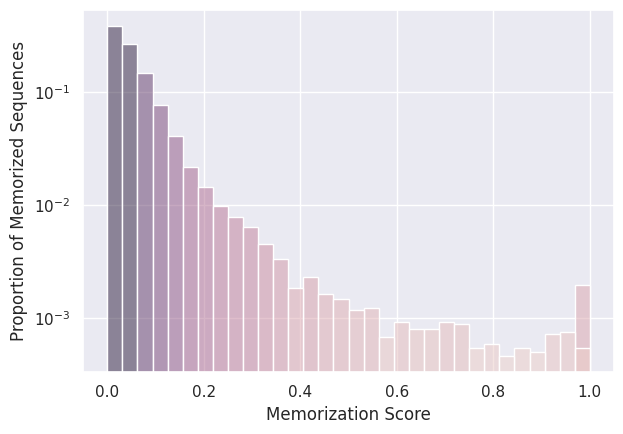

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


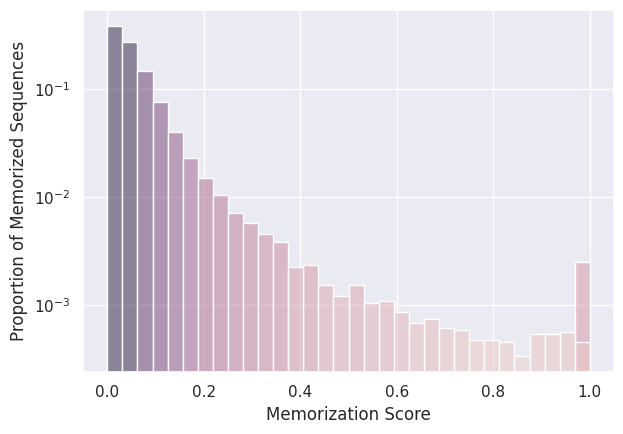

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


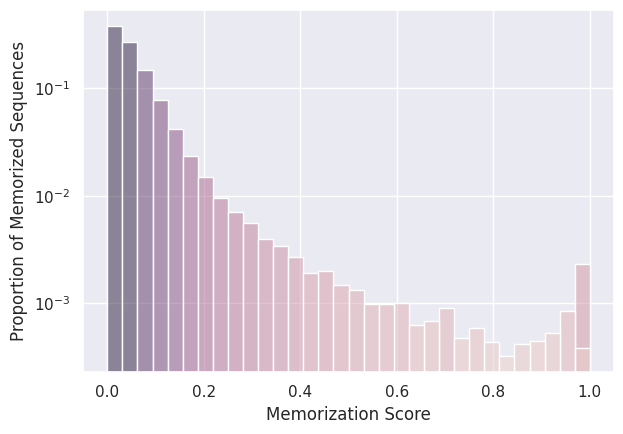

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


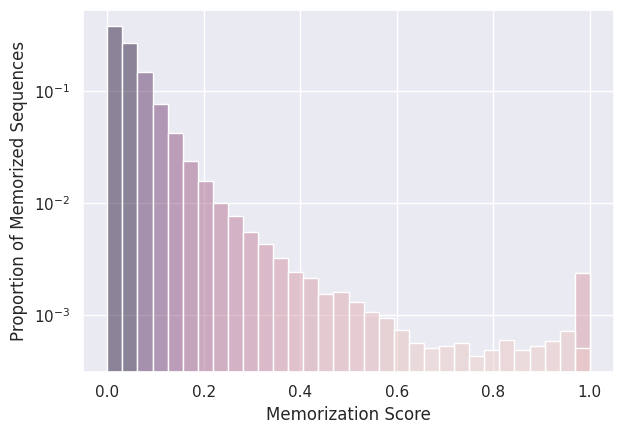

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


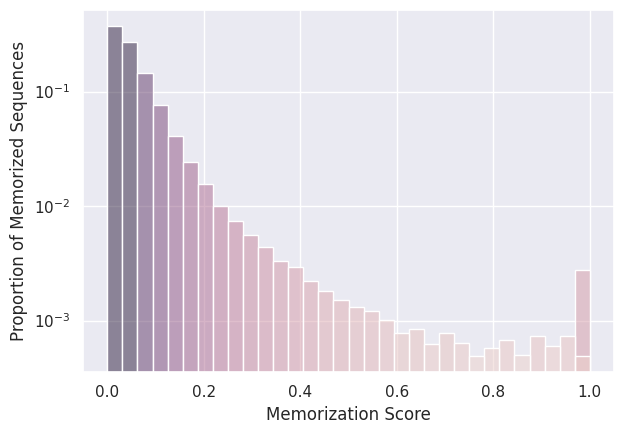

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


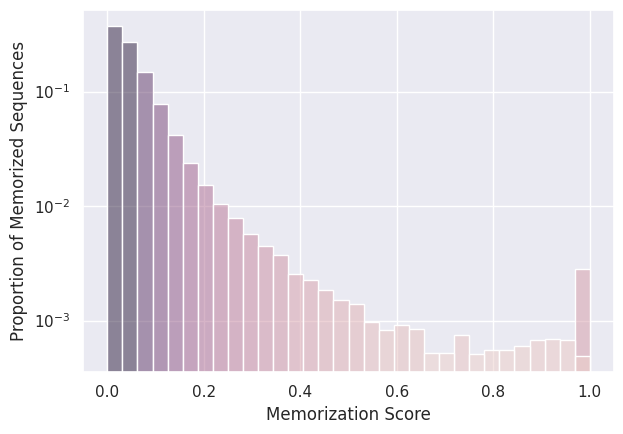

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


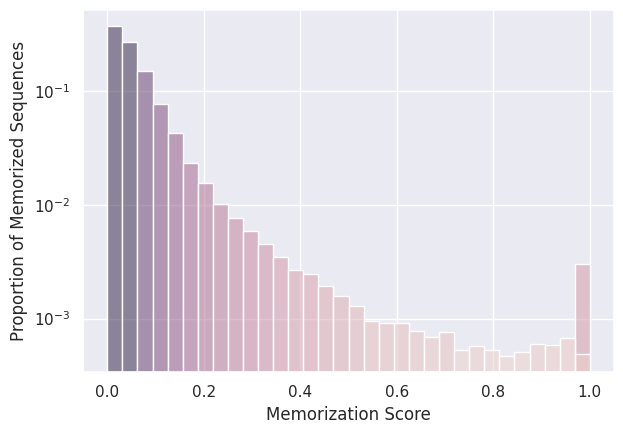

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


160M-deduped:   0%|          | 0/7 [00:00<?, ?it/s]

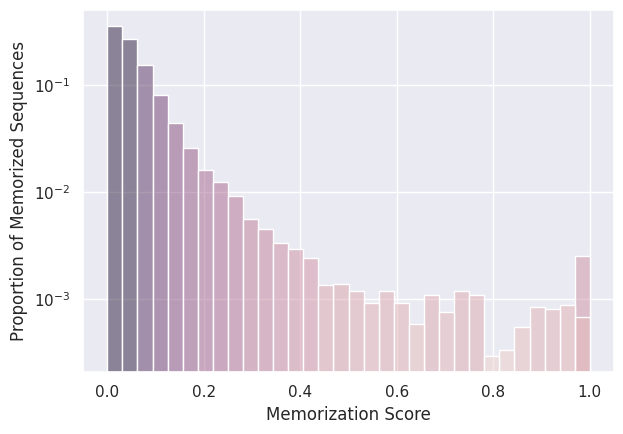

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


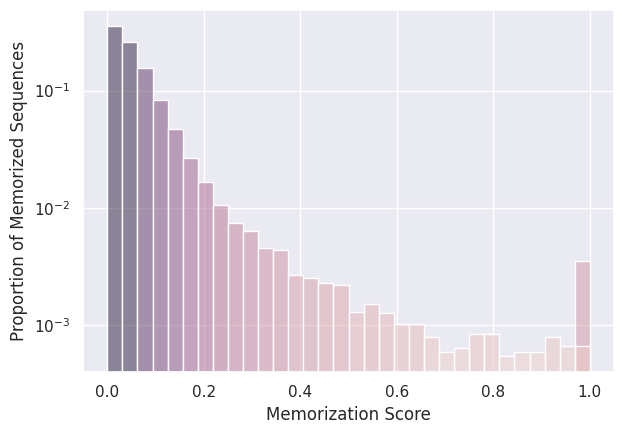

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


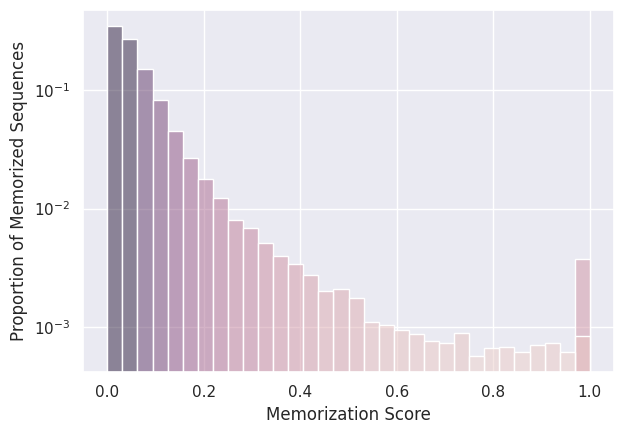

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


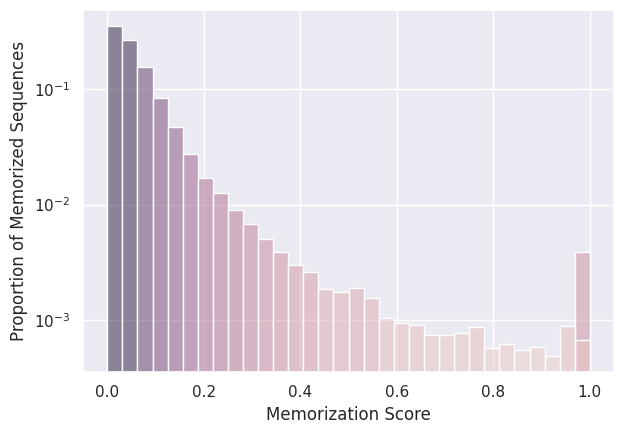

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


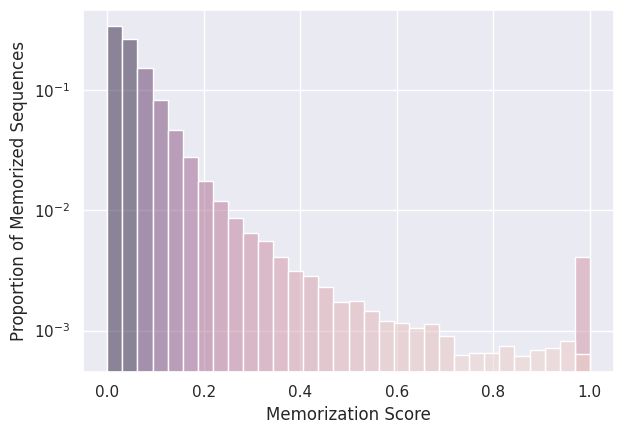

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


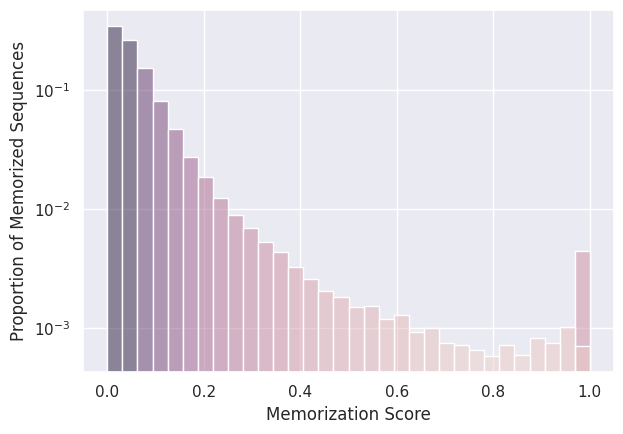

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


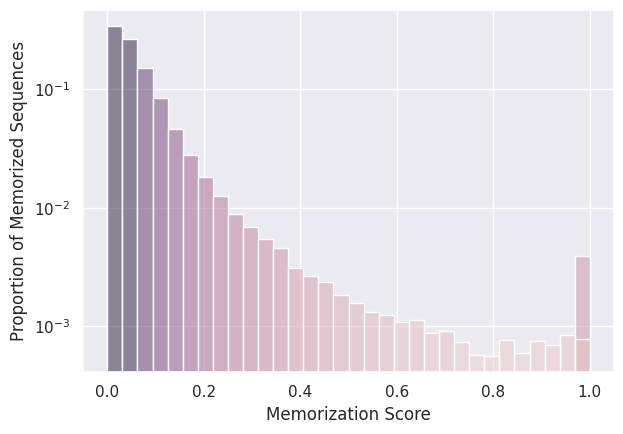

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


410M-deduped:   0%|          | 0/7 [00:00<?, ?it/s]

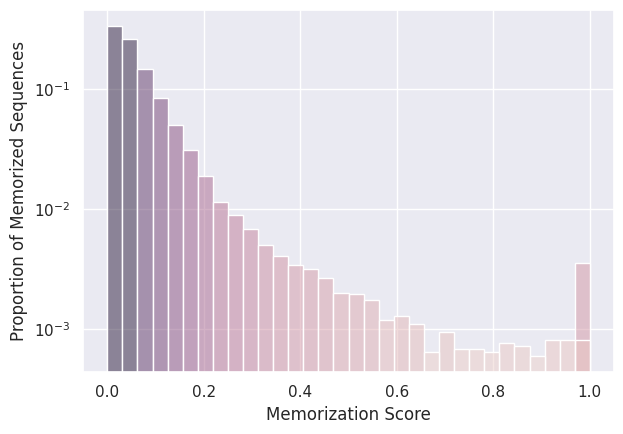

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


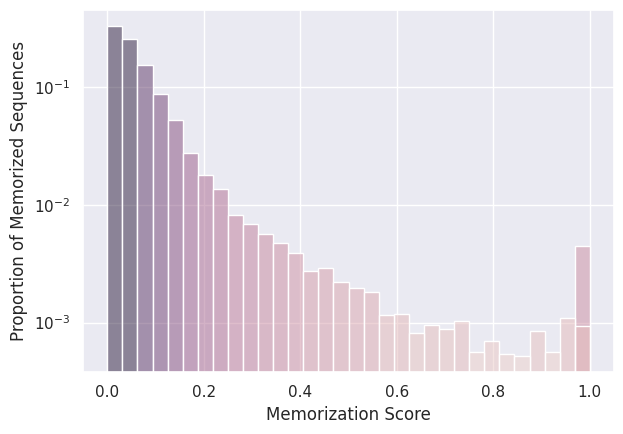

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


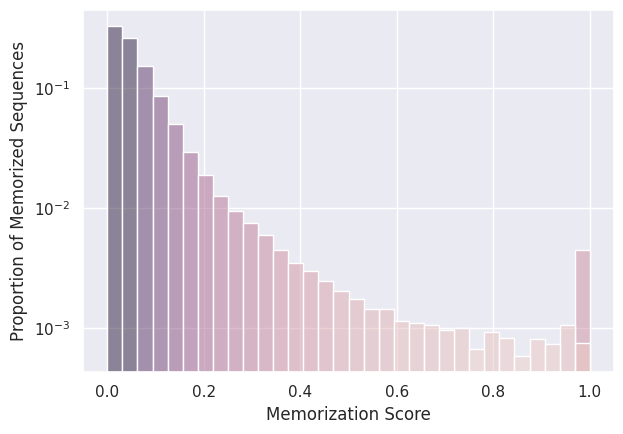

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


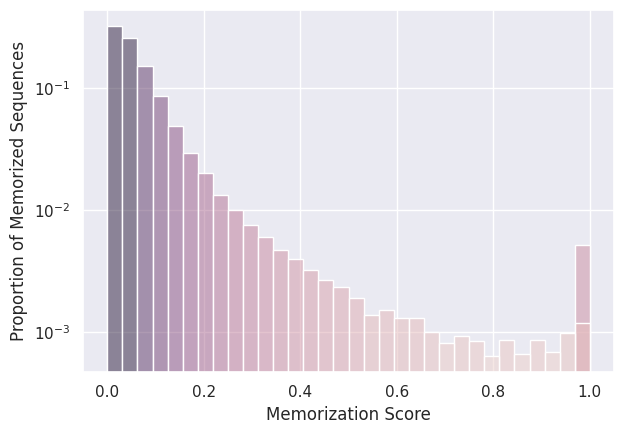

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


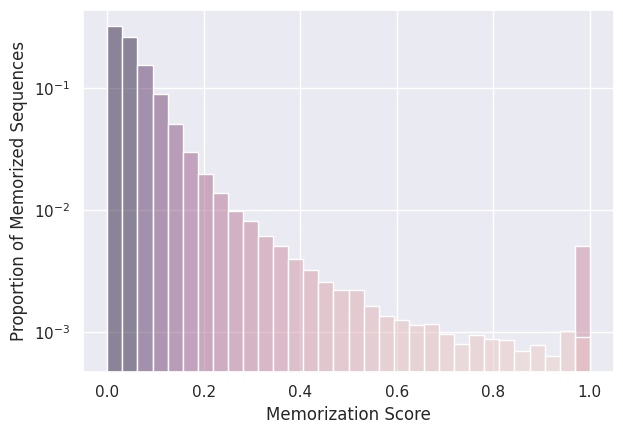

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


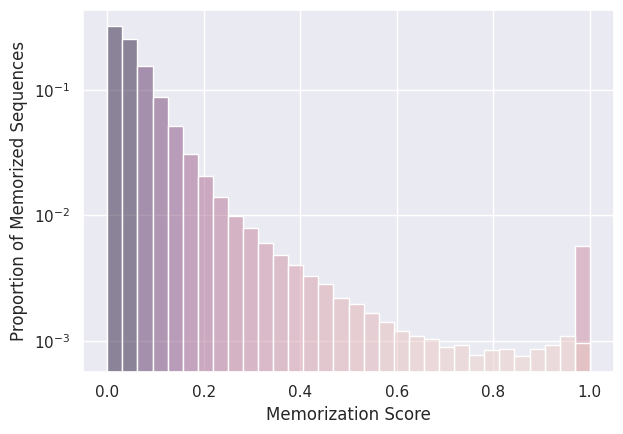

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


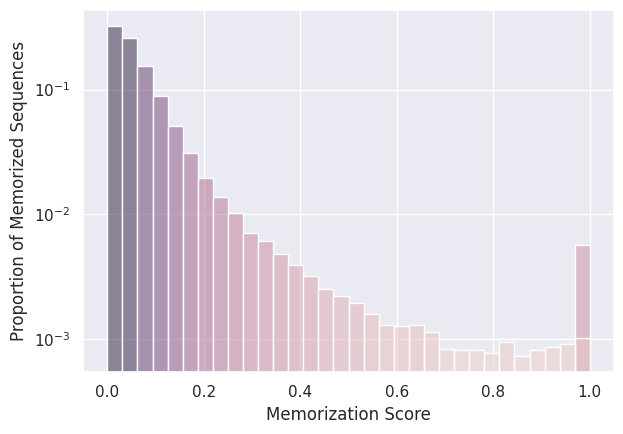

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


1B-deduped:   0%|          | 0/7 [00:00<?, ?it/s]

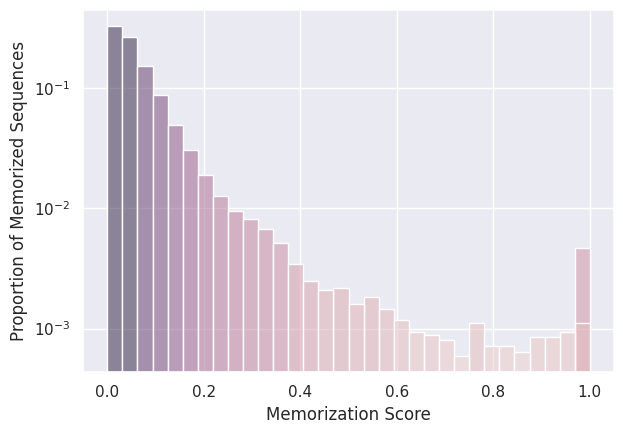

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


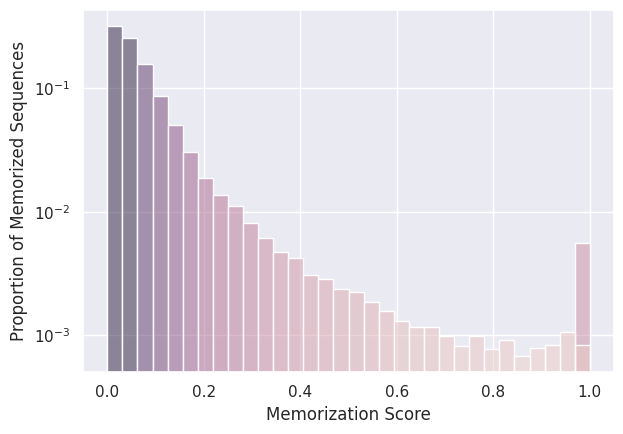

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


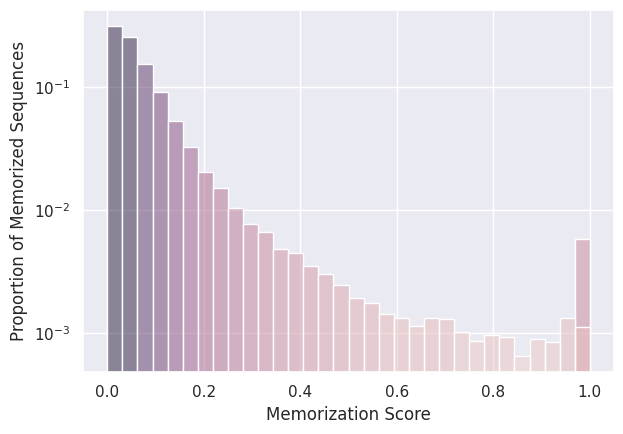

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


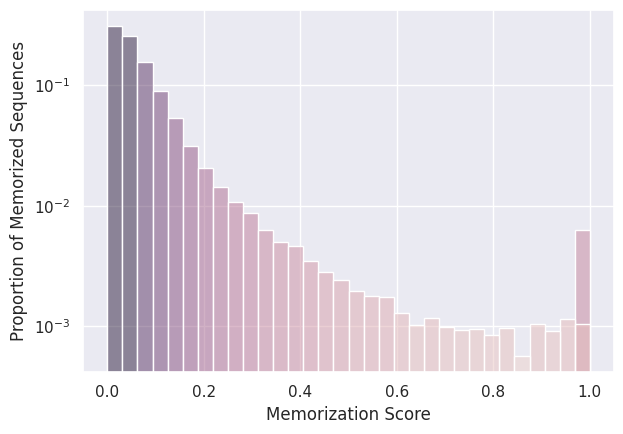

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


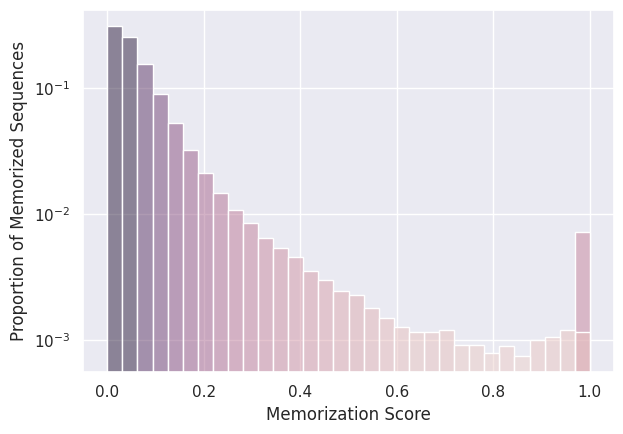

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


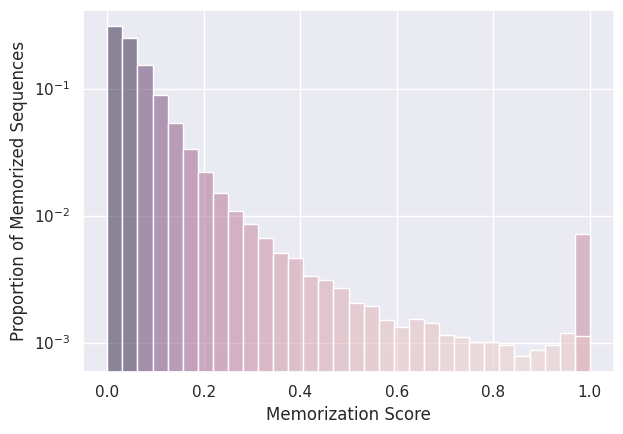

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


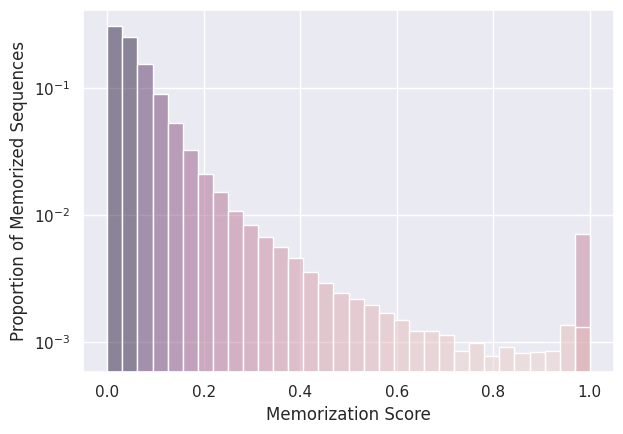

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


1.4B-deduped:   0%|          | 0/7 [00:00<?, ?it/s]

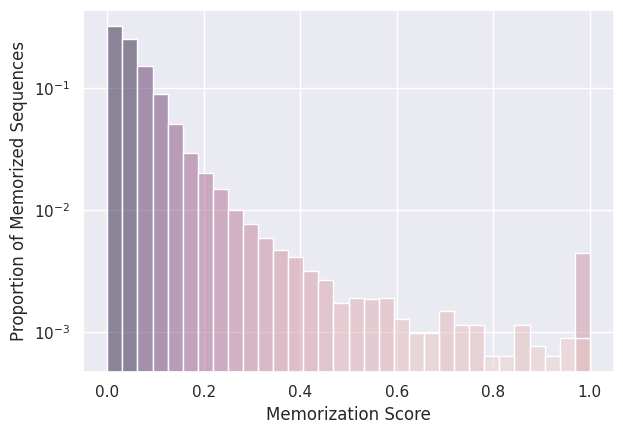

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


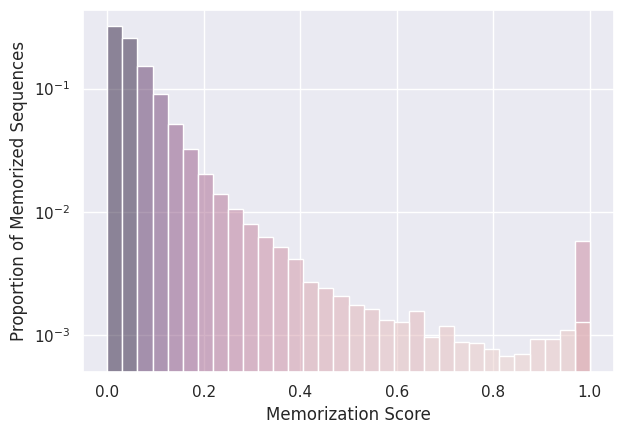

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


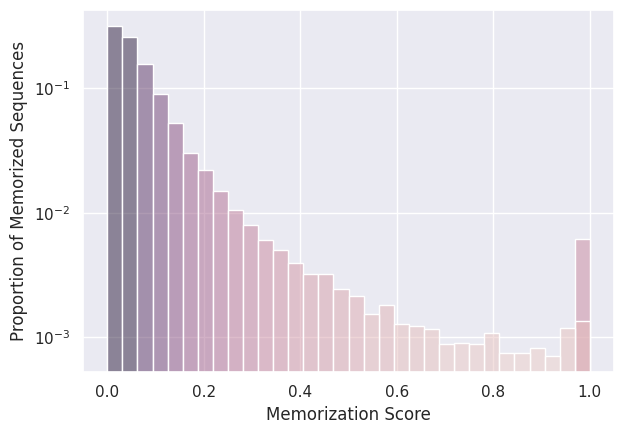

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


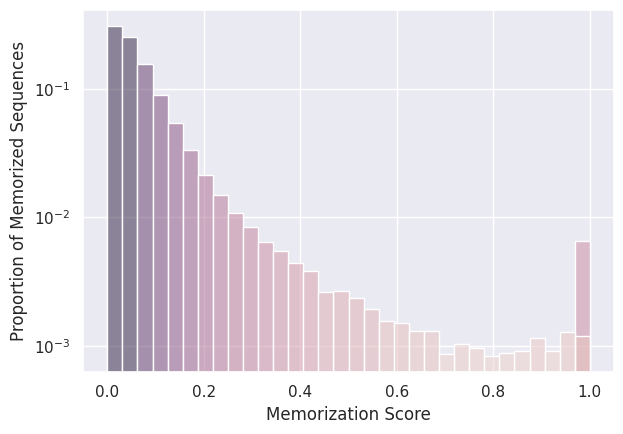

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


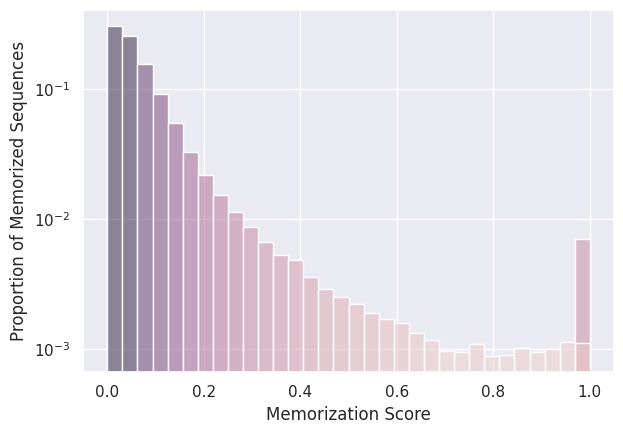

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


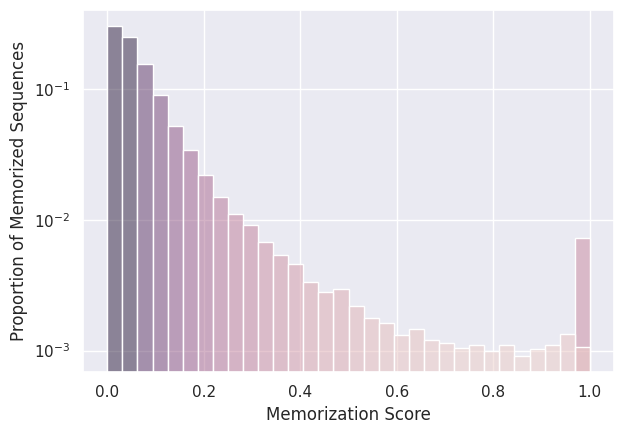

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


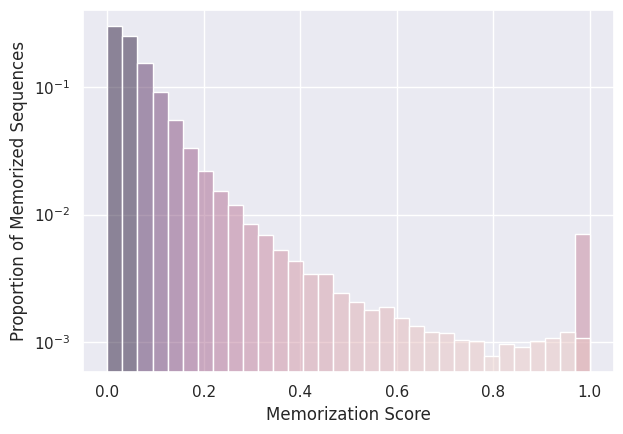

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


2.8B-deduped:   0%|          | 0/7 [00:00<?, ?it/s]

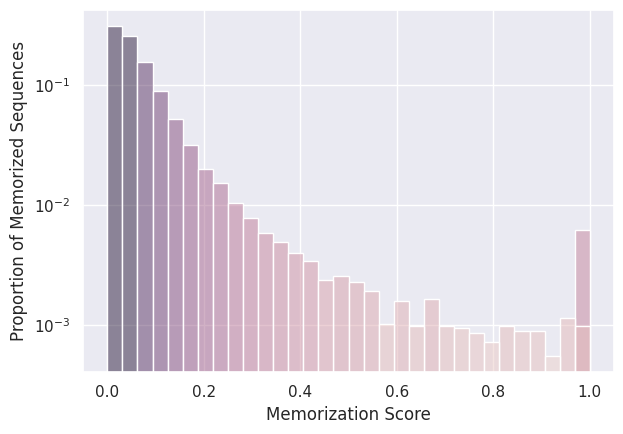

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


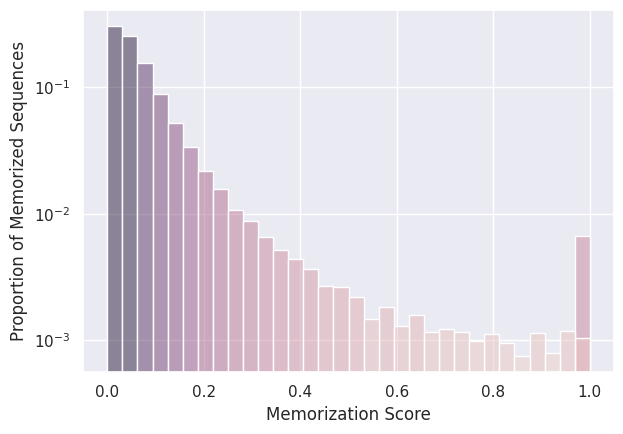

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


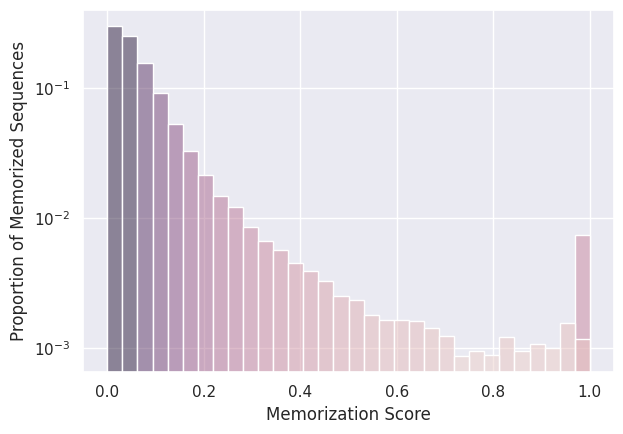

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


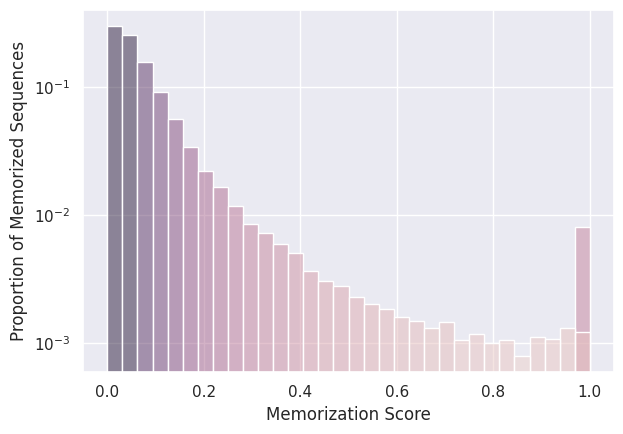

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


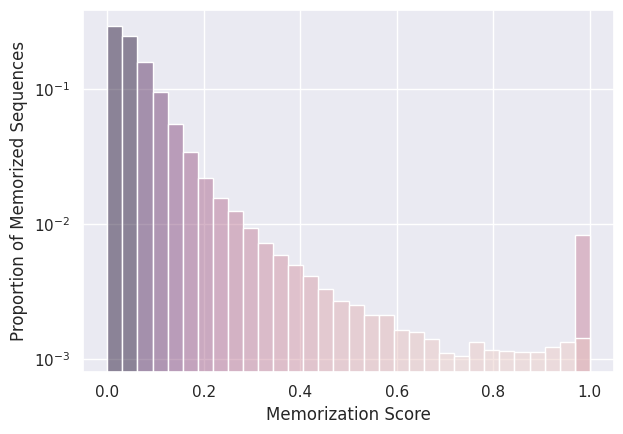

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


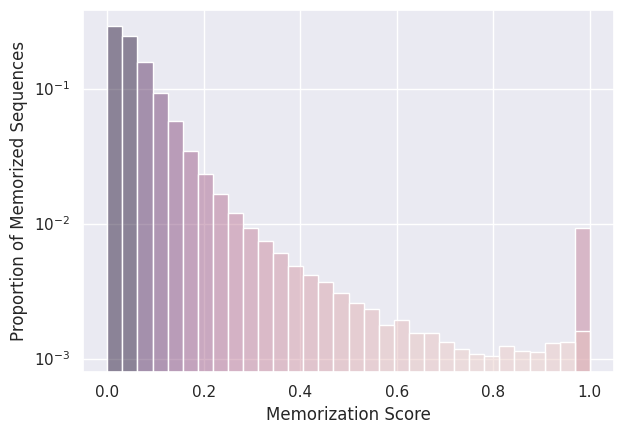

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


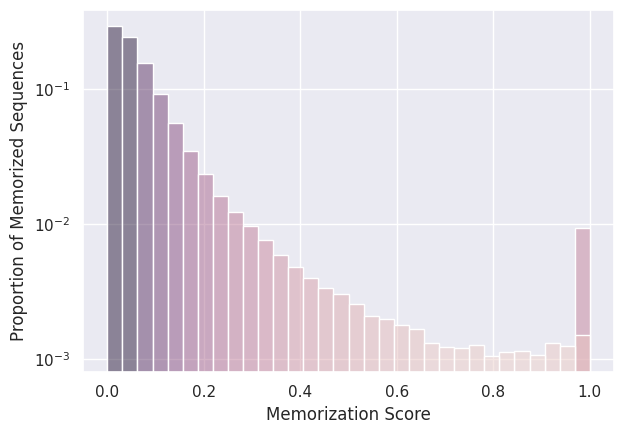

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


6.9B-deduped:   0%|          | 0/7 [00:00<?, ?it/s]

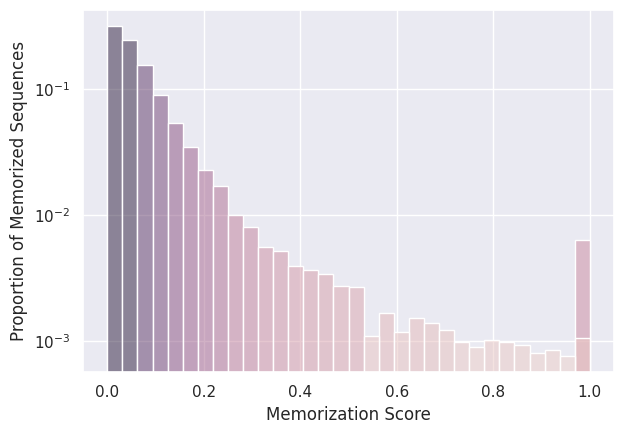

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


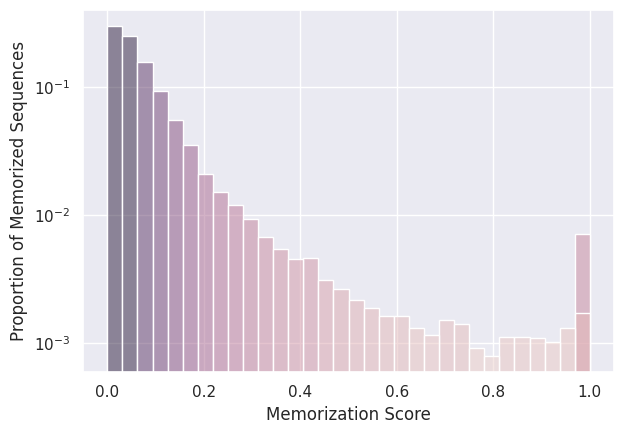

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


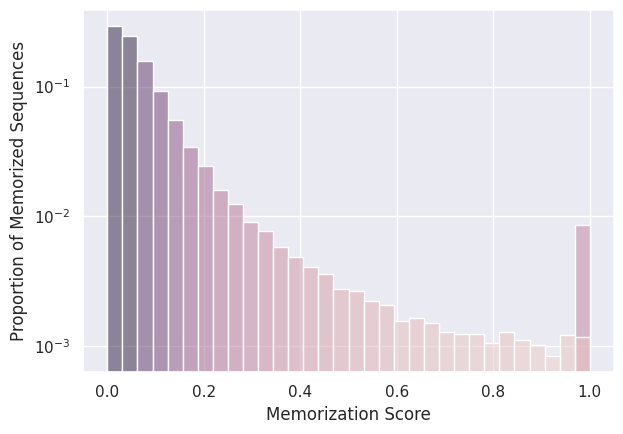

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


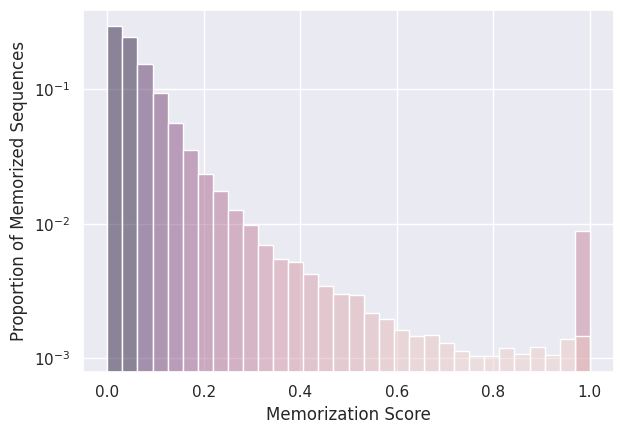

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


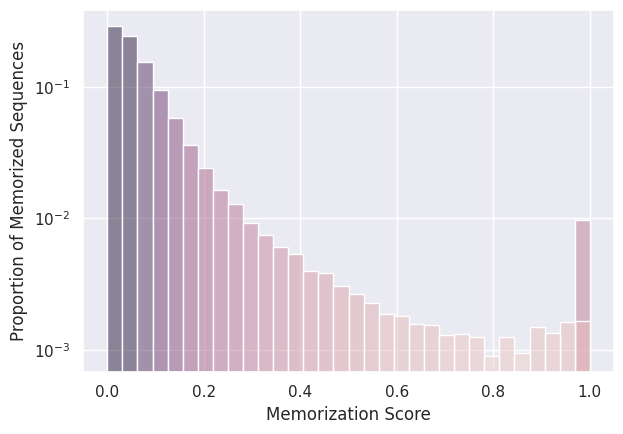

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


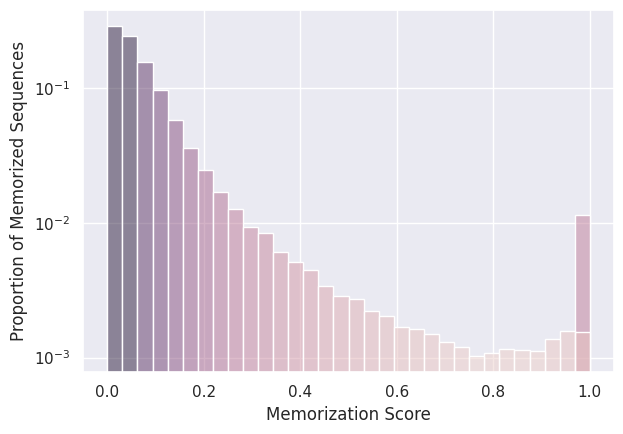

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


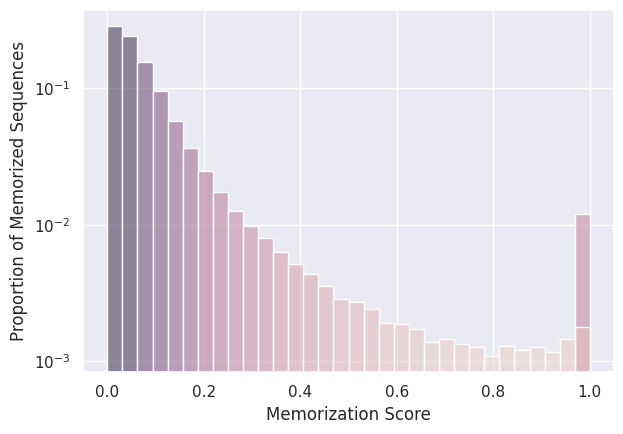

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


12B-deduped:   0%|          | 0/7 [00:00<?, ?it/s]

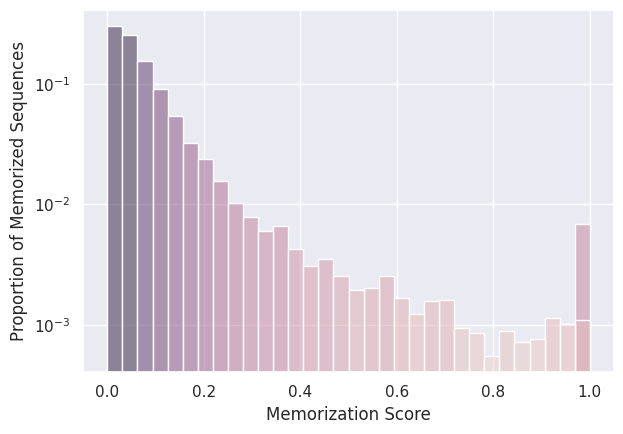

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


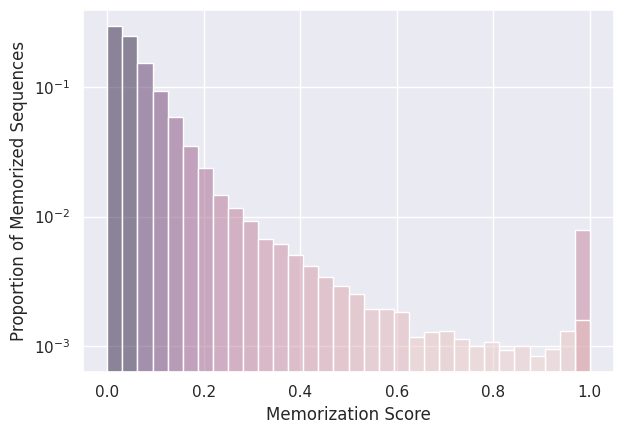

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


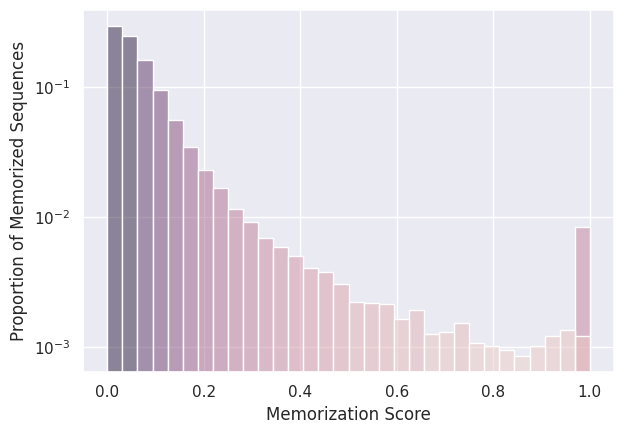

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


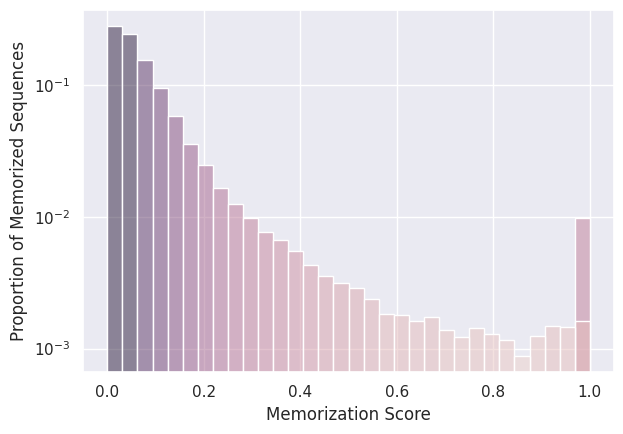

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


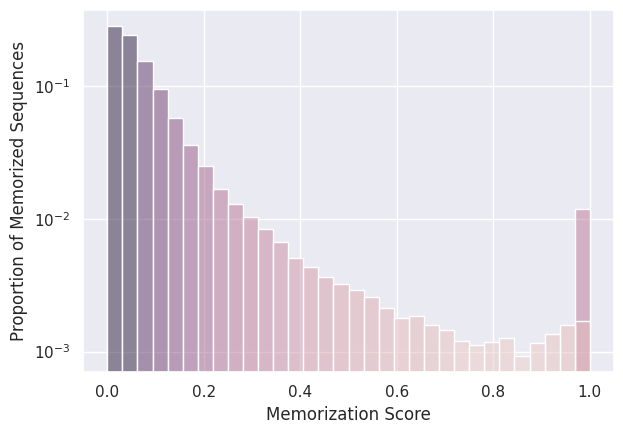

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


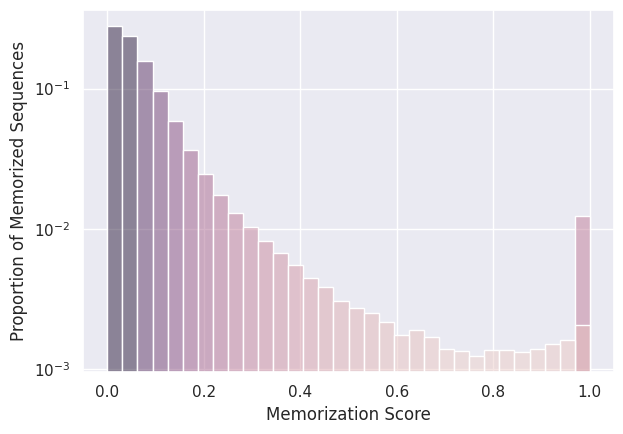

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


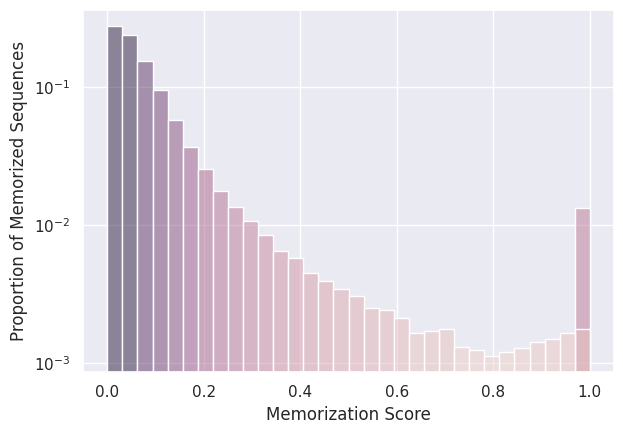

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import img2pdf
from matplotlib.colors import LogNorm

def hist_plot_of_checkpoint(model, checkpoint):
    '''Plots accuracy distribution on marginal axes and Scatter plot on joint axis
    
    Note that the colormap of scatter plot is log normalized
    `model`: Model name
    `checkpoint`: Checkpoint of the corresponding model
    '''
    # Theming
    plt.clf()
    sns.set_theme(font_scale=1)
    model_name = f'{model}-{checkpoint}'
    
    # Extract Data
    evals = memorization_results[model_name].sample(frac=0.001)
    evals['Memorization Score'] = evals['accuracy']
    evals['Sequence Index'] = evals['index']
    
    # Binning
    bins = pd.cut(evals['Memorization Score'], bins=32)
    counts = evals.groupby(bins)['index'].count().reset_index()
    
    # Map binning counts to each row
    evals['acc_bin_counts'] = bins.apply(lambda x:counts[
        counts['Memorization Score'] == x]['index'].iloc[0]).astype('int32')
    
    # Calculate distribution of values
    acc_density = evals['acc_bin_counts']/evals['acc_bin_counts'].max()
    ax = sns.histplot(
        evals, 
        x = 'Memorization Score', 
        hue = acc_density.to_numpy(), 
        bins = 32, 
        legend = False, 
        stat = 'proportion',
        hue_norm = LogNorm(),
    )
    ax.set_yscale('log')

    # Labeling figure
    ax.set_ylabel("Proportion of Memorized Sequences")
    checkpoint = checkpoint_names[checkpoints.index(checkpoint)]
    model_name = f'{model}-{checkpoint}'
    fig  = ax.get_figure()
#     fig.suptitle(f"{model_name} Memorization Score Distribution Plot", fontsize=15)
    fig.tight_layout()
    fig.subplots_adjust(top=0.90)
    plt.savefig(f"./plots/tmp.png")
    plt.show()
    with open(f"./plots/memorization_dist_deduped_{model}-{checkpoint}.pdf","wb") as f:
        f.write(img2pdf.convert('./plots/tmp.png'))
        
for model in models:
    for checkpoint in tqdm(checkpoints, desc = model):
        hist_plot_of_checkpoint(model, checkpoint)

# Scatter Hist Plot

In [10]:
import seaborn as sns
from matplotlib.colors import LogNorm

def scatter_plot_of_checkpoint(model, checkpoint):
    '''Plots accuracy distribution on marginal axes and Scatter plot on joint axis
    
    Note that the colormap of scatter plot is log normalized
    `model`: Model name
    `checkpoint`: Checkpoint of the corresponding model
    '''
    # Theming
    plt.clf()
    sns.set_theme(font_scale=1)
    model_name = f'{model}-{checkpoint}'
    
    # Extract Data
    evals = memorization_results[model_name].sample(frac=0.001)
    evals['Memorization Score'] = evals['accuracy']
    evals['Sequence Index'] = evals['index']
    
    # Binning
    bins = pd.cut(evals['Memorization Score'], bins=32)
    counts = evals.groupby(bins)['index'].count().reset_index()
    
    # Map binning counts to each row
    evals['acc_bin_counts'] = bins.apply(lambda x:counts[
        counts['Memorization Score'] == x]['index'].iloc[0]).astype('int32')
    
    # Calculate distribution of values
    acc_density = evals['acc_bin_counts']/evals['acc_bin_counts'].max()
    
    # Plotting
    grid = sns.JointGrid(
        data = evals, 
        x = 'Sequence Index', 
        y = 'Memorization Score', 
        height = 8,  
        space = 0, 
        marginal_ticks = True,
        hue = acc_density.to_numpy(), 
#         hue_norm = LogNorm(),
    )
    
    # Scatter plot
    grid.plot_joint(
        sns.scatterplot,
        legend=False
    )
    
    # Histograms
    grid.plot_marginals(sns.histplot, fill=True, alpha=1, stat='probability', bins=32)
    
    # Labeling figure
    checkpoint = checkpoint_names[checkpoints.index(checkpoint)]
    model_name = f'{model}-{checkpoint}'
    fig  = grid.figure
    fig.suptitle(f"{model_name} Scatter and Hist Plot", fontsize=15)
    fig.tight_layout()
    fig.subplots_adjust(top=0.95)
    plt.savefig(f"./plots/tmp.png")
    with open(f"./plots/scatter_hist_{model}-{checkpoint}.pdf","wb") as f:
        f.write(img2pdf.convert('./plots/tmp.png'))
    

In [ ]:
import multiprocessing as mp
from multiprocessing import Process, Lock
manager = MPManager()
lock = Lock()
for model in models:
    for checkpoint in tqdm(checkpoints, desc = model):
#         manager.add(Process(target=scatter_plot_of_checkpoint, args=(model, 
#             checkpoint)))
        scatter_plot_of_checkpoint(model, checkpoint)

# Model correlation plots

70M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

160M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

410M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

1B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

1.4B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

2.8B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

6.9B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

12B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


70M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

160M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

410M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

1B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

1.4B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

2.8B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

6.9B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

12B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


70M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

160M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

410M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

1B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

1.4B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

2.8B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

6.9B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

12B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


70M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

160M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

410M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

1B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

1.4B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

2.8B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

6.9B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

12B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


70M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

160M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

410M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

1B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

1.4B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

2.8B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

6.9B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

12B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


70M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

160M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

410M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

1B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

1.4B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

2.8B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

6.9B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

12B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


70M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

160M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

410M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

1B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

1.4B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

2.8B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

6.9B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

12B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


70M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

160M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

410M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

1B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

1.4B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

2.8B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

6.9B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

12B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


70M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

160M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

410M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

1B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

1.4B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

2.8B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

6.9B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

12B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


70M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

160M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

410M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

1B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

1.4B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

2.8B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

6.9B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

12B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


70M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

160M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

410M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

1B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

1.4B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

2.8B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

6.9B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

12B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


70M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

160M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

410M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

1B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

1.4B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

2.8B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

6.9B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

12B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


70M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

160M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

410M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

1B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

1.4B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

2.8B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

6.9B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

12B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


70M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

160M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

410M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

1B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

1.4B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

2.8B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

6.9B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

12B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


70M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

160M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

410M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

1B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

1.4B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

2.8B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

6.9B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

12B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


70M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

160M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

410M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

1B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

1.4B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

2.8B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

6.9B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

12B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


70M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

160M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

410M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

1B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

1.4B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

2.8B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

6.9B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

12B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


70M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

160M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

410M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

1B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

1.4B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

2.8B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

6.9B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

12B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


70M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

160M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

410M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

1B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

1.4B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

2.8B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

6.9B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

12B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


70M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

160M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

410M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

1B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

1.4B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

2.8B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

6.9B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

12B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


70M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

160M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

410M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

1B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

1.4B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

2.8B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

6.9B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

12B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


70M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

160M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

410M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

1B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

1.4B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

2.8B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

6.9B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

12B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


70M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

160M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

410M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

1B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

1.4B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

2.8B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

6.9B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

12B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


70M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

160M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

410M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

1B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

1.4B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

2.8B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

6.9B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

12B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


70M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

160M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

410M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

1B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

1.4B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

2.8B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

6.9B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

12B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


70M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

160M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

410M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

1B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

1.4B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

2.8B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

6.9B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

12B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


70M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

160M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

410M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

1B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

1.4B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

2.8B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

6.9B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

12B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


70M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

160M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

410M-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

1B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

1.4B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

2.8B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

6.9B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

12B-deduped:   0%|          | 0/8 [00:00<?, ?it/s]

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


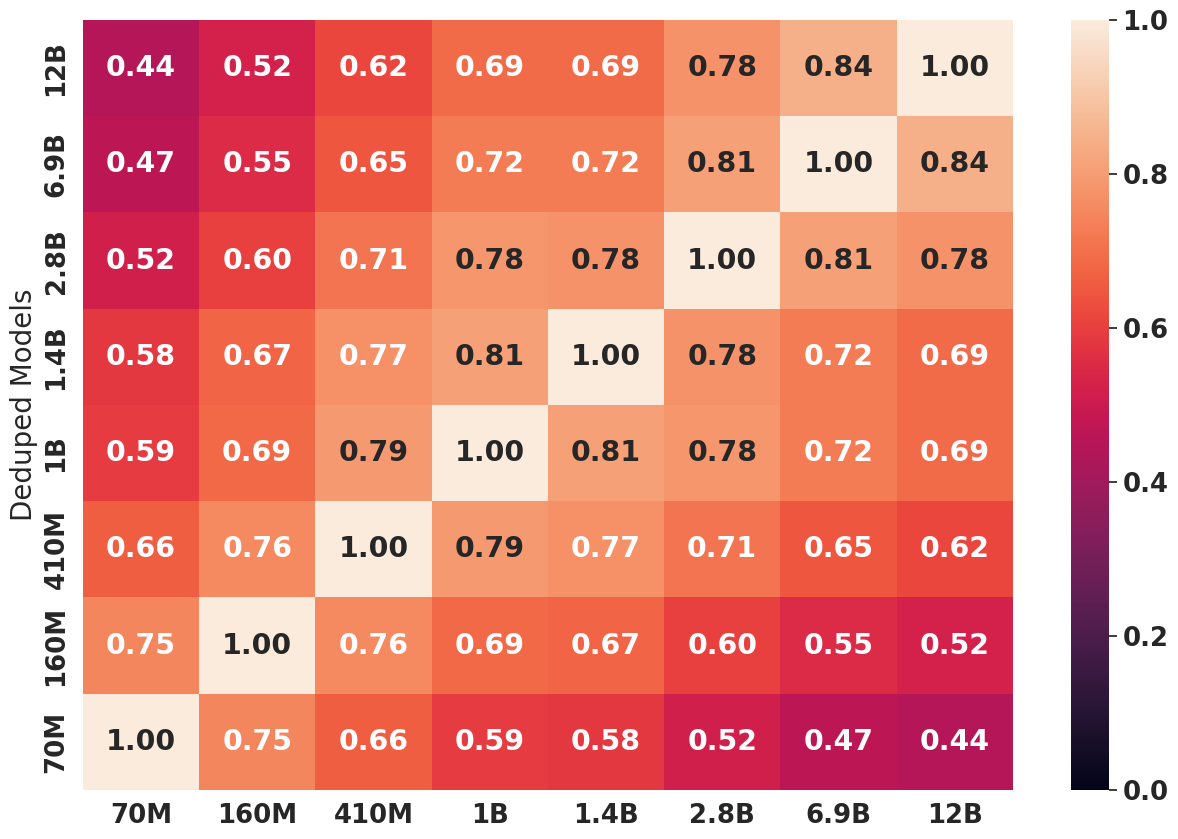

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import img2pdf
import numpy as np

def correlation_heatmap_of_models(percentile=0, checkpoint=143000):
    '''Plots Pearson'R correlation between models
    
    `percentile`: Most memorized data percentile
    '''
    # Theming
    plt.clf()
    plt.rcParams["figure.figsize"] = (32,32)
    sns.set_theme(font_scale=1.7)
    
    
    # We will use stats.pearsonr for correlation calculations
    df = {}
    for model in models:
        df[model] = memorization_results[f'{model}-{checkpoint}']['accuracy']
    
    # Extract top percentile evals if specified
    for model in models:
        if percentile > 0 and percentile != 1:
            top_percentile_acc = np.nanpercentile(df[f'{model}'],percentile)
            df[f'{model}'] = df[f'{model}'] >= top_percentile_acc
            df[f'{model}'] = df[f'{model}'].astype('float32').to_numpy()
        elif percentile == 1:
            df[f'{model}'] = df[f'{model}'] == 1
            df[f'{model}'] = df[f'{model}'].astype('float32')
    
    model_names = [m.split('-')[0] for m in models]
    correlation = pd.DataFrame(index = model_names)
    for model_1 in models:
        corrs = []
        for model_2 in tqdm(models, desc=model_1):
            acc_1 = df[model_1]
            acc_2 = df[model_2]
            corr = stats.pearsonr(acc_1, acc_2).statistic
            corrs.append(corr)
        correlation[model_names[models.index(model_1)]] = corrs
    
    # Heatmap we add annotations to also indicate value of pearson's R
    ax = sns.heatmap(correlation, annot=True, fmt='.2f', vmin=0, vmax=1, yticklabels = model_names, xticklabels = model_names)
    ax.invert_yaxis()
    checkpoint = checkpoint_names[checkpoints.index(checkpoint)]
    title = f"{checkpoint} Deduped Checkpoint Correlation Heatmap"
    if percentile == 1:
        title += f" on Memorized Indicies"
    elif percentile > 0:
        title += f" on top {percentile} Indicies"
#     plt.title(title, fontsize=25)
    plt.ylabel("Deduped Models", fontsize=20)
    plt.savefig('./plots/tmp.png')
    if percentile == 0:
        with open(f"./plots/model_correlation_deduped_{checkpoint}.pdf","wb") as f:
            f.write(img2pdf.convert('./plots/tmp.png'))
    elif percentile == 1:
        with open(f"./plots/model_correlation_deduped_{checkpoint}_acc1.pdf","wb") as f:
            f.write(img2pdf.convert('./plots/tmp.png'))
    else:
        with open(f"./plots/model_correlation_deduped_{checkpoint}_{percentile}_percentile.pdf","wb") as f:
            f.write(img2pdf.convert('./plots/tmp.png'))
update_params()
for checkpoint in checkpoints:
    correlation_heatmap_of_models(0, checkpoint)
    correlation_heatmap_of_models(90, checkpoint)
    correlation_heatmap_of_models(99, checkpoint)
    correlation_heatmap_of_models(1, checkpoint)

# Checkpoint correlation plots

70M-deduped-23000:   0%|          | 0/7 [00:00<?, ?it/s]

70M-deduped-43000:   0%|          | 0/7 [00:00<?, ?it/s]

70M-deduped-63000:   0%|          | 0/7 [00:00<?, ?it/s]

70M-deduped-83000:   0%|          | 0/7 [00:00<?, ?it/s]

70M-deduped-103000:   0%|          | 0/7 [00:00<?, ?it/s]

70M-deduped-123000:   0%|          | 0/7 [00:00<?, ?it/s]

70M-deduped-143000:   0%|          | 0/7 [00:00<?, ?it/s]

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


160M-deduped-23000:   0%|          | 0/7 [00:00<?, ?it/s]

160M-deduped-43000:   0%|          | 0/7 [00:00<?, ?it/s]

160M-deduped-63000:   0%|          | 0/7 [00:00<?, ?it/s]

160M-deduped-83000:   0%|          | 0/7 [00:00<?, ?it/s]

160M-deduped-103000:   0%|          | 0/7 [00:00<?, ?it/s]

160M-deduped-123000:   0%|          | 0/7 [00:00<?, ?it/s]

160M-deduped-143000:   0%|          | 0/7 [00:00<?, ?it/s]

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


410M-deduped-23000:   0%|          | 0/7 [00:00<?, ?it/s]

410M-deduped-43000:   0%|          | 0/7 [00:00<?, ?it/s]

410M-deduped-63000:   0%|          | 0/7 [00:00<?, ?it/s]

410M-deduped-83000:   0%|          | 0/7 [00:00<?, ?it/s]

410M-deduped-103000:   0%|          | 0/7 [00:00<?, ?it/s]

410M-deduped-123000:   0%|          | 0/7 [00:00<?, ?it/s]

410M-deduped-143000:   0%|          | 0/7 [00:00<?, ?it/s]

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


1B-deduped-23000:   0%|          | 0/7 [00:00<?, ?it/s]

1B-deduped-43000:   0%|          | 0/7 [00:00<?, ?it/s]

1B-deduped-63000:   0%|          | 0/7 [00:00<?, ?it/s]

1B-deduped-83000:   0%|          | 0/7 [00:00<?, ?it/s]

1B-deduped-103000:   0%|          | 0/7 [00:00<?, ?it/s]

1B-deduped-123000:   0%|          | 0/7 [00:00<?, ?it/s]

1B-deduped-143000:   0%|          | 0/7 [00:00<?, ?it/s]

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


1.4B-deduped-23000:   0%|          | 0/7 [00:00<?, ?it/s]

1.4B-deduped-43000:   0%|          | 0/7 [00:00<?, ?it/s]

1.4B-deduped-63000:   0%|          | 0/7 [00:00<?, ?it/s]

1.4B-deduped-83000:   0%|          | 0/7 [00:00<?, ?it/s]

1.4B-deduped-103000:   0%|          | 0/7 [00:00<?, ?it/s]

1.4B-deduped-123000:   0%|          | 0/7 [00:00<?, ?it/s]

1.4B-deduped-143000:   0%|          | 0/7 [00:00<?, ?it/s]

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


2.8B-deduped-23000:   0%|          | 0/7 [00:00<?, ?it/s]

2.8B-deduped-43000:   0%|          | 0/7 [00:00<?, ?it/s]

2.8B-deduped-63000:   0%|          | 0/7 [00:00<?, ?it/s]

2.8B-deduped-83000:   0%|          | 0/7 [00:00<?, ?it/s]

2.8B-deduped-103000:   0%|          | 0/7 [00:00<?, ?it/s]

2.8B-deduped-123000:   0%|          | 0/7 [00:00<?, ?it/s]

2.8B-deduped-143000:   0%|          | 0/7 [00:00<?, ?it/s]

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


6.9B-deduped-23000:   0%|          | 0/7 [00:00<?, ?it/s]

6.9B-deduped-43000:   0%|          | 0/7 [00:00<?, ?it/s]

6.9B-deduped-63000:   0%|          | 0/7 [00:00<?, ?it/s]

6.9B-deduped-83000:   0%|          | 0/7 [00:00<?, ?it/s]

6.9B-deduped-103000:   0%|          | 0/7 [00:00<?, ?it/s]

6.9B-deduped-123000:   0%|          | 0/7 [00:00<?, ?it/s]

6.9B-deduped-143000:   0%|          | 0/7 [00:00<?, ?it/s]

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


12B-deduped-23000:   0%|          | 0/7 [00:00<?, ?it/s]

12B-deduped-43000:   0%|          | 0/7 [00:00<?, ?it/s]

12B-deduped-63000:   0%|          | 0/7 [00:00<?, ?it/s]

12B-deduped-83000:   0%|          | 0/7 [00:00<?, ?it/s]

12B-deduped-103000:   0%|          | 0/7 [00:00<?, ?it/s]

12B-deduped-123000:   0%|          | 0/7 [00:00<?, ?it/s]

12B-deduped-143000:   0%|          | 0/7 [00:00<?, ?it/s]

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


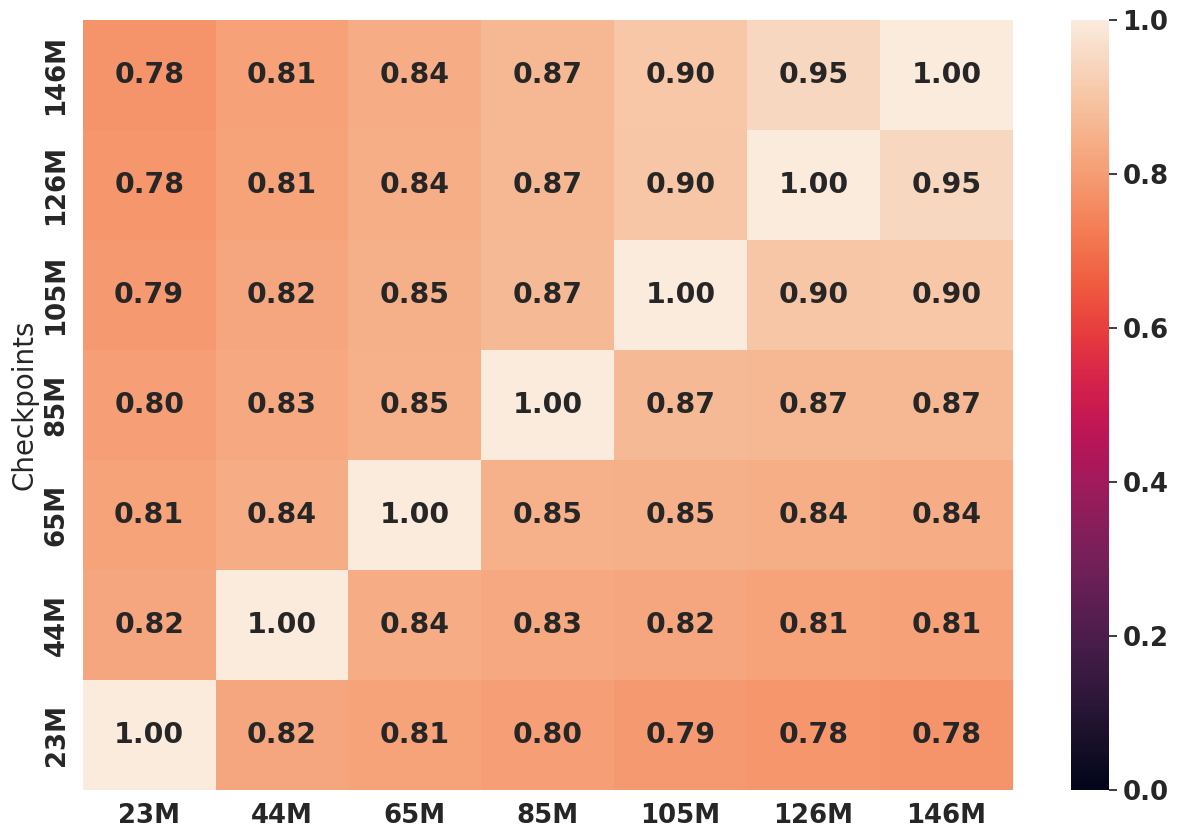

In [12]:
import scipy.stats as stats
def plot_correlation_heatmap_of_checkpoint(model):
    '''Plots Pearson'R correlation between checkpoints of a model
    
    `model`: Model to plot correlation of
    '''
    # Theming
    plt.clf()
    plt.rcParams["figure.figsize"] = (32,32)
    sns.set_theme(font_scale=1.7)
    
    
    # We will use stats.pearsonr for correlation calculations
    # We only consider Sequence indicies that are evaluated by all checkpoints
    max_sequence_index = 1024*23000
    df = {}
    for checkpoint in checkpoints:
        df[checkpoint] = memorization_results[f'{model}-{checkpoint}']
        df[checkpoint] = df[checkpoint][df[checkpoint]['index'] < max_sequence_index]
        df[checkpoint] = df[checkpoint]['accuracy'].to_numpy()
        
   
    # Get correlation
    correlation = pd.DataFrame(index = checkpoint_names)
    for checkpoint_1 in checkpoints:
        corrs = []
        for checkpoint_2 in tqdm(checkpoints, desc=f'{model}-{checkpoint_1}'):
            acc_1 = df[checkpoint_1]
            acc_2 = df[checkpoint_2]
            corr = stats.pearsonr(acc_1, acc_2).statistic
            corrs.append(corr)
        correlation[checkpoint_names[checkpoints.index(checkpoint_1)]] = corrs
    
    # Heatmap we add annotations to also indicate value of pearson's R
    ax = sns.heatmap(correlation, annot=True, fmt='.2f', vmin=0, vmax=1)
    ax.invert_yaxis()
    title = f"{model} Parameter Correlation Heatmap"
#     plt.title(title, fontsize=25)
    plt.ylabel("Checkpoints", fontsize=20)
    plt.savefig('./plots/tmp.png')
    
    # Save plots to pdf
    with open(f"./plots/checkpoint_correlation_{model}.pdf","wb") as f:
        f.write(img2pdf.convert('./plots/tmp.png'))
update_params()
for model in models:
    plot_correlation_heatmap_of_checkpoint(model)

# KS Test & Q-Q plot: Uniformity Experiments

19m-deduped:   0%|          | 0/1 [00:00<?, ?it/s]

/tmp/ipykernel_565016/742275120.py:98: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  ax.figure.colorbar(sm) # label = "No. Overlapping Quantiles"
Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


125m-deduped:   0%|          | 0/1 [00:00<?, ?it/s]

/tmp/ipykernel_565016/742275120.py:98: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  ax.figure.colorbar(sm) # label = "No. Overlapping Quantiles"
Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


350m-deduped:   0%|          | 0/1 [00:00<?, ?it/s]

/tmp/ipykernel_565016/742275120.py:98: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  ax.figure.colorbar(sm) # label = "No. Overlapping Quantiles"
Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


800m-deduped:   0%|          | 0/1 [00:00<?, ?it/s]

/tmp/ipykernel_565016/742275120.py:98: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  ax.figure.colorbar(sm) # label = "No. Overlapping Quantiles"
Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


1.3b-deduped:   0%|          | 0/1 [00:00<?, ?it/s]

/tmp/ipykernel_565016/742275120.py:98: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  ax.figure.colorbar(sm) # label = "No. Overlapping Quantiles"
Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


2.7b-deduped:   0%|          | 0/1 [00:00<?, ?it/s]

/tmp/ipykernel_565016/742275120.py:98: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  ax.figure.colorbar(sm) # label = "No. Overlapping Quantiles"
Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


6.7b-deduped:   0%|          | 0/1 [00:00<?, ?it/s]

/tmp/ipykernel_565016/742275120.py:98: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  ax.figure.colorbar(sm) # label = "No. Overlapping Quantiles"
Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


13b-deduped:   0%|          | 0/1 [00:00<?, ?it/s]

/tmp/ipykernel_565016/742275120.py:98: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  ax.figure.colorbar(sm) # label = "No. Overlapping Quantiles"
Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.


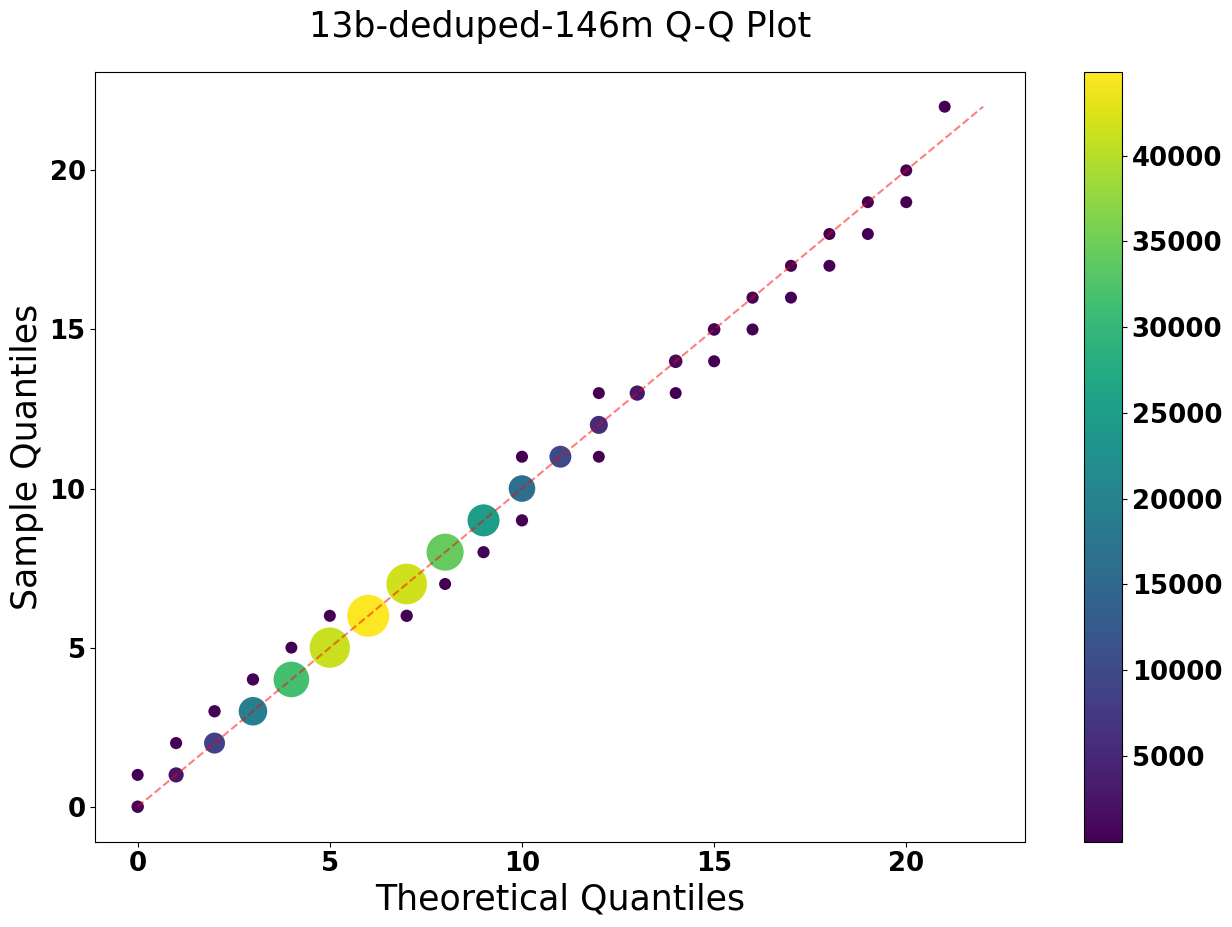

In [32]:
import seaborn as sns
import numpy as np
from scipy import stats
import statsmodels.api as smapi
import matplotlib.pyplot as plt
import img2pdf

update_params()

def jitter(values,j):
    return values + np.random.normal(j,0.1,values.shape)

def qq_plot(model, checkpoint):
    '''Plots Q-Q plot of a given model's checkpoint
    
    If "fully memorized event" is defined as occurrence of a fully memorized sequence index at a given time instance,
    Where time instance for a given sequence is the index of that particular sequence within training data,
    It is observed that frequency of fully memorized events within a time-period is uniform.
    
    This statement is validated by the plotted Q-Q plots where theoretical distribution is Poisson distribution fit on 
    observed frequencies of events.
    '''
    # Clearing previous plots
    plt.clf()
    
    # Load data
    evals = memorization_results[f'{model}-{checkpoint}']
    
    # Extract fully memorized events
    evals['acc1'] = (evals['accuracy'] == 1).astype('int32')
    
    # Set batch size, also works as time unit for our temporal evaluation
    batch_size = 512
    
    # Get event frequencies, where each event is getting memorization_acc = 1
    freqs = []
    for i in range(0, checkpoint*1024, batch_size):
        num_acc_1 = evals['acc1'].iloc[i:i+batch_size].sum()
        freqs.append(num_acc_1)
    
    average_rate = np.mean(freqs)
    total_num_events = len(freqs)
        
    plotter = smapi.ProbPlot(
        np.array(freqs), 
        dist = stats.poisson(average_rate,), 
    )
    
    checkpoint = checkpoint_names[checkpoints.index(checkpoint)]
    data = pd.DataFrame()
    data['Sample Quantiles'] = plotter.sample_quantiles
    data['Theoretical Quantiles']= plotter.theoretical_quantiles
    
    dist = {}
    
    for idx, row in data.iterrows():
        x = row['Sample Quantiles']
        y = row['Theoretical Quantiles']
        if x in dist:
            if y in dist[x]:
                dist[x][y] += 1
            else:
                dist[x][y] = 1
        else:
            dist[x] = {}
            dist[x][y] = 1
    hueintensity = []
    for idx, row in data.iterrows():
        x = row['Sample Quantiles']
        y = row['Theoretical Quantiles']
        hueintensity.append(dist[x][y])
    
    norm = plt.Normalize(np.min(hueintensity), np.max(hueintensity))
    sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
    sm.set_array([])
    
    # Reference line
    plt.plot(
        [0, max(freqs)], [0, max(freqs)], 
        color = 'red', 
        marker = None,
        linestyle='dashed',
        alpha = 0.5
    )
    
    
    ax = sns.scatterplot(
        data, 
        x = 'Theoretical Quantiles', 
        y = 'Sample Quantiles', 
        palette = 'viridis', 
        hue = hueintensity, 
        size = hueintensity,
        sizes = (100, 1000),
        legend = False
    )
    
    ax.figure.colorbar(sm) # label = "No. Overlapping Quantiles"
    plt.title(f"{model}-{checkpoint} Q-Q Plot")
    plt.savefig("./plots/tmp.png")
    with open(f"./plots/qq_plot_{model}-{checkpoint}.pdf","wb") as f:
        f.write(img2pdf.convert('./plots/tmp.png'))
    

for model in models:
    for checkpoint in tqdm(checkpoints[-1:], desc=model):
        qq_plot(model, checkpoint)
        

In [25]:
len(memorization_results['13b-143000'][memorization_results['13b-143000']['accuracy'] == 0.03125])

34340259

In [26]:
34340259/146432000

0.2345133509069056